In [1]:
! pip install pyarrow
! pip install pandas

# EDA Estados Fenológicos

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

#pd.set_option('display.max_columns', None)

In [3]:
df0 = pd.read_parquet('muestreos_parcelas.parquet')

In [4]:
df0

generated_muestreos       codparcela provincia               municipio  \
0      2020-04-23 14:30:39  023-00109-00-00   almeria                    abla   
1      2020-04-23 14:30:39  023-00109-00-00   almeria                    abla   
2      2020-04-23 14:30:39  023-00109-00-00   almeria                    abla   
3      2020-04-23 14:30:39  023-00109-00-00   almeria                    abla   
4      2020-04-23 14:30:39  023-00109-00-00   almeria                    abla   
...                    ...              ...       ...                     ...   
581788 2021-04-05 17:26:06   008-00013-01-2   sevilla  villanueva de san juan   
581789 2021-04-05 17:26:06   008-00013-01-2   sevilla  villanueva de san juan   
581790 2021-04-05 17:26:06   008-00013-01-2   sevilla  villanueva de san juan   
581791 2021-04-05 17:26:06   008-00013-01-2   sevilla  villanueva de san juan   
581792 2021-04-05 17:26:06   008-00013-01-2   sevilla  villanueva de san juan   

            fecha  campaña  poligono  parcela  recinto  subrecinto  ...  \
0      2006-04-16     2006        23      109        0           0  ...   
1      2006-04-27     2006        23      109        0           0  ...   
2      2006-05-04     2006        23      109        0           0  ...   
3      2006-05-11     2006        23      109        0           0  ...   
4      2006-05-17     2006        23      109        0           0  ...   
...           ...      ...       ...      ...      ...         ...  ...   
581788 2021-03-02     2021         8       13        1           2  ...   
581789 2021-03-09     2021         8       13        1           2  ...   
581790 2021-03-16     2021         8       13        1           2  ...   
581791 2021-03-23     2021         8       13        1           2  ...   
581792 2021-03-30     2021         8       13        1           2  ...   

        402_sensor_climático_asociado  207_riego:_sistema_usual_de_riego  \
0                               AL006                                NaN   
1                               AL006                                NaN   
2                               AL006                                NaN   
3                               AL006                                NaN   
4                               AL006                                NaN   
...                               ...                                ...   
581788                     El Saucejo                                NaN   
581789                     El Saucejo                                NaN   
581790                     El Saucejo                                NaN   
581791                     El Saucejo                                NaN   
581792                     El Saucejo                                NaN   

        108_u_h_c_a_la_que_pertenece  \
0                                NaN   
1                                NaN   
2                                NaN   
3                                NaN   
4                                NaN   
...                              ...   
581788                  LAS ATALAYAS   
581789                  LAS ATALAYAS   
581790                  LAS ATALAYAS   
581791                  LAS ATALAYAS   
581792                  LAS ATALAYAS   

        316_fecha_de_plantación_variedad_secundaria  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   
...                                             ...   
581788                                          NaN   
581789                                          NaN   
581790                                          NaN   
581791                                          NaN   
581792                                          NaN   

        315_patrón_variedad_secundaria  \
0                                  N

In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 581793 entries, 0 to 581792
Data columns (total 61 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   generated_muestreos                                 581793 non-null  datetime64[us]
 1   codparcela                                          581793 non-null  category      
 2   provincia                                           581793 non-null  string        
 3   municipio                                           581793 non-null  string        
 4   fecha                                               581793 non-null  datetime64[us]
 5   campaña                                             581793 non-null  uint16        
 6   poligono                                            581731 non-null  UInt16        
 7   parcela                                             581763 non-null  UInt16        
 8  

In [6]:
df0.describe()

generated_muestreos                       fecha        campaña  \
count                      581793                      581793  581793.000000   
mean   2020-07-28 10:47:40.400259  2013-05-09 05:27:09.876605    2012.815476   
min           2020-04-23 14:30:39         2003-06-01 00:00:00    2003.000000   
25%           2020-04-23 14:39:25         2009-07-14 00:00:00    2009.000000   
50%           2020-04-23 16:54:05         2012-10-16 00:00:00    2012.000000   
75%           2021-04-05 17:26:06         2017-06-12 00:00:00    2017.000000   
max           2021-04-05 17:26:06         2021-11-24 00:00:00    2022.000000   
std                           NaN                         NaN       4.443574   

        poligono     parcela   recinto  subrecinto  estado_fenologico_1  \
count   581731.0    581763.0  580067.0    477220.0         35816.000000   
mean    22.70381  149.634942  1.481868     1.44547             1.541574   
min          0.0         0.0       0.0        -1.0             0.000000   
25%          7.0        21.0       0.0         0.0             1.000000   
50%         14.0        67.0       1.0         0.0             2.000000   
75%         29.0       167.0       1.0         1.0             2.000000   
max        504.0     18103.0      90.0        99.0             2.000000   
std    29.597579  617.659737  3.599486     6.93249             0.498300   

       estado_fenologico_2  estado_fenologico_3  ...  102_coordenada_x_(utm)  \
count         62000.000000         56106.000000  ...            5.708570e+05   
mean              1.619823             1.569066  ...            1.686746e+08   
min               0.000000             1.000000  ...            2.449790e+02   
25%               1.000000             1.000000  ...            3.485290e+05   
50%               2.000000             2.000000  ...            3.975380e+05   
75%               2.000000             2.000000  ...            4.445440e+05   
max               2.000000             2.000000  ...            4.571674e+11   
std               0.485416             0.495202  ...            8.277092e+09   

       103_coordenada_y_(utm)  104_altitud_(m)  \
count            5.707590e+05    389024.000000   
mean             1.645839e+09       587.299988   
min              4.092371e+00         0.000000   
25%              4.121614e+06       400.000000   
50%              4.146395e+06       560.000000   
75%              4.185504e+06       755.000000   
max              4.142861e+12      3560.000000   
std              8.156944e+10       258.239471   

       201_superf_cultivada_en_la_parcela_agrícola_(ha)  202_pendiente_(%)  \
count                                     530584.000000      380385.000000   
mean                                          54.694424          10.152251   
min                                            0.000000           0.000000   
25%                                            2.006000           4.000000   
50%                                            6.150000           8.000000   
75%                                           21.629999          15.000000   
max                                        35781.000000          64.000000   
std                                          304.985657           8.583870   

       302_densidad_(plantas/ha)  303_nº_pies_por_árbol  \
count              500483.000000          443244.000000   
mean                  144.684006               2.346755   
min                     0.000000               0.000000   
25%                   100.000000               1.000000   
50%                   110.000000               2.000000   
75%                   157.000000               3.000000   
max                 11879.000000             193.000000   
std                   172.839951               4.808364   

       305_diámetro_de_copa_(m)  317_%_superficie_ocupada_variedad_secundaria  \
count             122053.000000                                  23241.000000   
mean                  47.526875                 

## Exploración estados fenológicos
Hay algún estado fenológico cuyo min/max values no es ni 1 ni 2, por quiero comprobar los datos que vienen informados

In [7]:
# Análisis de las columnas de estado fenológico
columnas_estados = [f'estado_fenologico_{i}' for i in range(14,0,-1)]
fenologico_analysis = {}

for col in columnas_estados:
    unique_counts = df0[col].value_counts(dropna=False)  # Contar valores únicos incluyendo NaN
    n_unique = len(df0[col].unique()) - 1  # Número de valores únicos (sin contar NaN)
    n_nulls = df0[col].isnull().sum()  # Número de nulos
    perc_nulls = (n_nulls / len(df0)) * 100  # Porcentaje de nulos
    
    # Guardar los resultados en un diccionario
    fenologico_analysis[col] = {
        'unique_values': unique_counts,
        'number_of_unique_values': n_unique,
        'number_of_nulls': n_nulls,
        'percentage_of_nulls': perc_nulls
    }

fenologico_analysis


{'estado_fenologico_14': {'unique_values': estado_fenologico_14
  NaN    574352
  1.0      6455
  2.0       986
  Name: count, dtype: int64,
  'number_of_unique_values': 2,
  'number_of_nulls': 574352,
  'percentage_of_nulls': 98.72102276926672},
 'estado_fenologico_13': {'unique_values': estado_fenologico_13
  NaN    548639
  1.0     23320
  2.0      9834
  Name: count, dtype: int64,
  'number_of_unique_values': 2,
  'number_of_nulls': 548639,
  'percentage_of_nulls': 94.3014096078846},
 'estado_fenologico_12': {'unique_values': estado_fenologico_12
  NaN     511383
  1.0      42270
  2.0      28139
  11.0         1
  Name: count, dtype: int64,
  'number_of_unique_values': 3,
  'number_of_nulls': 511383,
  'percentage_of_nulls': 87.89775744981463},
 'estado_fenologico_11': {'unique_values': estado_fenologico_11
  NaN    482246
  1.0     49982
  2.0     49565
  Name: count, dtype: int64,
  'number_of_unique_values': 2,
  'number_of_nulls': 482246,
  'percentage_of_nulls': 82.8896188163

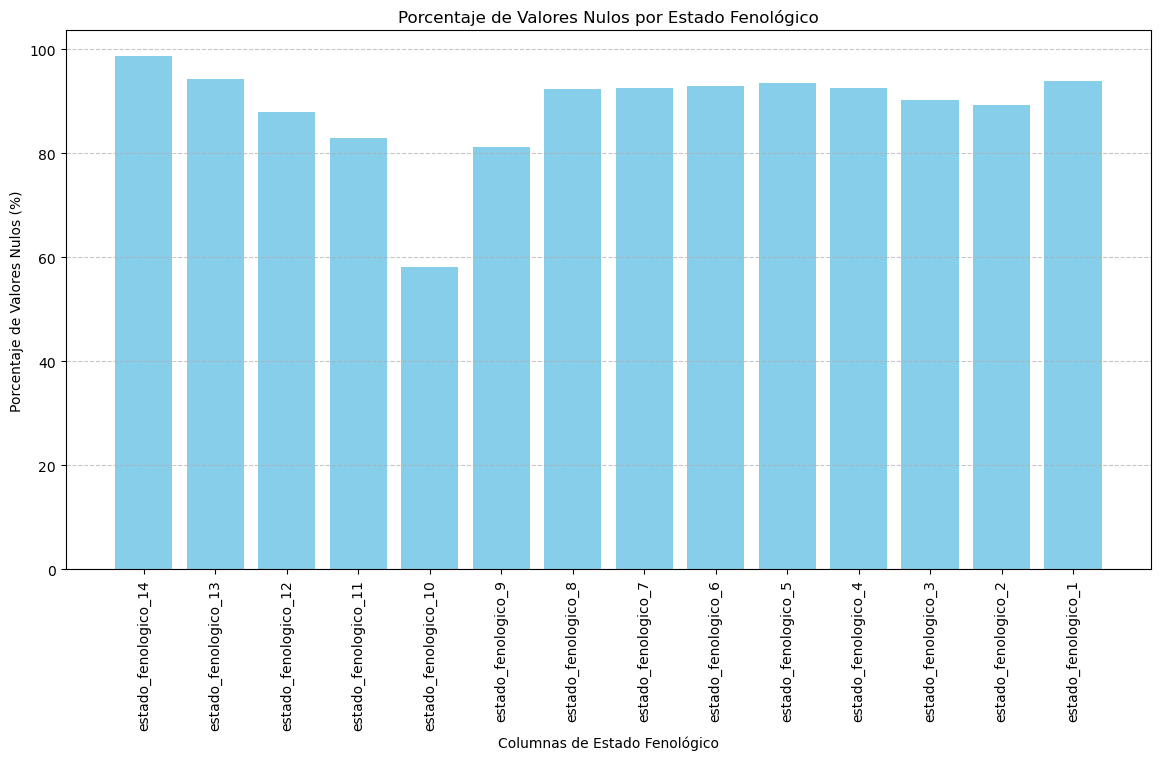

In [8]:
fenologico_null_percents = [info['percentage_of_nulls'] for info in fenologico_analysis.values()]
fenologico_labels = list(fenologico_analysis.keys())

plt.figure(figsize=(14, 7))
plt.bar(fenologico_labels, fenologico_null_percents, color='skyblue')
plt.xlabel('Columnas de Estado Fenológico')
plt.ylabel('Porcentaje de Valores Nulos (%)')
plt.title('Porcentaje de Valores Nulos por Estado Fenológico')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Podemos ver como el estado fenológico menos informado es el 14. Lo cual nos puede dar problemas de cara a predecir ese estado (que a priori es el más importante) con nuestro modelo. El estado 10 es el que aparece más veces informado, es posible que en esa etapa del desarrollo del olivo haya habido más interés en tomar las muestras mientras que en etapa más avanzadas se centren más en recolectar y no tanto en realizar el muestreo. También es posible que en el estado 10 los olivos pasen mucho tiempo.

Vamos a explorar si alguna fila tiene todos los estados fenológicos nulos para poder eliminarlas.

In [9]:
# Verificar si alguna fila tiene todos los valores de estado fenológico en nulo
all_fenologico_null = df0[columnas_estados].isnull().all(axis=1)
rows_with_all_fenologico_null = all_fenologico_null.sum()
print('Filas sin estado fenológico informado:',rows_with_all_fenologico_null)

# Podemos dropear esas filas
df0 = df0[~all_fenologico_null]
df = df0.copy()

# Verificar que las filas han sido eliminadas correctamente
remaining_null_fenologico_rows = df[columnas_estados].isnull().all(axis=1).sum()
df.shape, remaining_null_fenologico_rows

Filas sin estado fenológico informado: 12959


((568834, 61), 0)

#### Revisión estados fenologicos mal informados

Hemos visto que los datos con valores distintos a 1 y 2 son minoritarios y los podemos mirar en detalle ya que son pocos casos.

**Estado fenolófico 12 - Parece que ese 11 es un typo de un 1, lo sustituimos**

In [10]:
columnas = ['codparcela','fecha'] + columnas_estados

In [11]:
mask = df['estado_fenologico_12'] == 11
df[mask][columnas]

codparcela      fecha  estado_fenologico_14  \
121124  017-00006-11-01 2014-11-24                   NaN   

        estado_fenologico_13  estado_fenologico_12  estado_fenologico_11  \
121124                   2.0                  11.0                   NaN   

        estado_fenologico_10  estado_fenologico_9  estado_fenologico_8  \
121124                   NaN                  NaN                  NaN   

        estado_fenologico_7  estado_fenologico_6  estado_fenologico_5  \
121124                  NaN                  NaN                  NaN   

        estado_fenologico_4  estado_fenologico_3  estado_fenologico_2  \
121124                  NaN                  NaN                  NaN   

        estado_fenologico_1  
121124                  NaN

In [12]:
df.loc[mask, 'estado_fenologico_12'] = 1

**Estado fenolófico 10 - Las filas parecen venir mal informadas por lo que las dropeamos**

In [13]:
mask = df['estado_fenologico_10'].isin([3, 5, 0])
df[mask][columnas]

codparcela      fecha  estado_fenologico_14  \
47776   002-00204-01-01 2012-09-05                   NaN   
74901   076-00005-00-00 2008-09-24                   NaN   
115979  006-00442-01-01 2016-08-03                   NaN   

        estado_fenologico_13  estado_fenologico_12  estado_fenologico_11  \
47776                    NaN                   NaN                   NaN   
74901                    NaN                   NaN                   NaN   
115979                   NaN                   NaN                   NaN   

        estado_fenologico_10  estado_fenologico_9  estado_fenologico_8  \
47776                    5.0                  NaN                  NaN   
74901                    0.0                  NaN                  NaN   
115979                   3.0                  NaN                  NaN   

        estado_fenologico_7  estado_fenologico_6  estado_fenologico_5  \
47776                   NaN                  NaN                  NaN   
74901                   NaN                  NaN                  NaN   
115979                  NaN                  NaN                  NaN   

        estado_fenologico_4  estado_fenologico_3  estado_fenologico_2  \
47776                   NaN                  NaN                  NaN   
74901                   NaN                  NaN                  NaN   
115979                  NaN                  NaN                  NaN   

        estado_fenologico_1  
47776                   NaN  
74901                   NaN  
115979                  NaN

In [14]:
df = df.loc[~mask]

**Estado fenolófico 9 - Las filas con 0.5 las mantenemos y las de 3 las dropeamos**

In [15]:
mask = df['estado_fenologico_9'].isin([3, 0.5])
df[mask][columnas]

codparcela      fecha  estado_fenologico_14  \
27076   055-00034-00-00 2007-06-02                   NaN   
105833  016-00042-00-00 2007-07-04                   NaN   
124307  045-00126-01-01 2011-05-31                   NaN   
124308  045-00126-01-01 2011-06-07                   NaN   
124443  045-00129-02-01 2011-05-31                   NaN   
124444  045-00129-02-01 2011-06-07                   NaN   

        estado_fenologico_13  estado_fenologico_12  estado_fenologico_11  \
27076                    NaN                   NaN                   NaN   
105833                   NaN                   NaN                   NaN   
124307                   NaN                   NaN                   NaN   
124308                   NaN                   NaN                   NaN   
124443                   NaN                   NaN                   NaN   
124444                   NaN                   NaN                   NaN   

        estado_fenologico_10  estado_fenologico_9  estado_fenologico_8  \
27076                    2.0                  0.5                  NaN   
105833                   2.0                  0.5                  NaN   
124307                   NaN                  3.0                  NaN   
124308                   NaN                  3.0                  NaN   
124443                   NaN                  3.0                  NaN   
124444                   NaN                  3.0                  NaN   

        estado_fenologico_7  estado_fenologico_6  estado_fenologico_5  \
27076                   NaN                  NaN                  NaN   
105833                  NaN                  NaN                  NaN   
124307                  NaN                  NaN                  NaN   
124308                  NaN                  NaN                  NaN   
124443                  NaN                  NaN                  NaN   
124444                  NaN                  NaN                  NaN   

        estado_fenologico_4  estado_fenologico_3  estado_fenologico_2  \
27076                   NaN                  NaN                  NaN   
105833                  NaN                  NaN                  NaN   
124307                  NaN                  NaN                  NaN   
124308                  NaN                  NaN                  NaN   
124443                  NaN                  NaN                  NaN   
124444                  NaN                  NaN                  NaN   

        estado_fenologico_1  
27076                   NaN  
105833                  NaN  
124307                  NaN  
124308                  NaN  
124443                  NaN  
124444                  NaN

**Estado fenolófico 6 -**

In [16]:
mask = df['estado_fenologico_6'].isin([3])
df[mask][columnas]

codparcela      fecha  estado_fenologico_14  estado_fenologico_13  \
96785  063-00109-00-00 2007-05-15                   NaN                   NaN   

       estado_fenologico_12  estado_fenologico_11  estado_fenologico_10  \
96785                   NaN                   NaN                   NaN   

       estado_fenologico_9  estado_fenologico_8  estado_fenologico_7  \
96785                  NaN                  NaN                  NaN   

       estado_fenologico_6  estado_fenologico_5  estado_fenologico_4  \
96785                  3.0                  1.0                  NaN   

       estado_fenologico_3  estado_fenologico_2  estado_fenologico_1  
96785                  NaN                  NaN                  NaN

**Estado fenolófico 2 -**

In [17]:
mask = df['estado_fenologico_2'].isin([0])
df[mask][columnas]

codparcela      fecha  estado_fenologico_14  \
290577  023-00453-05-00 2015-03-17                   NaN   

        estado_fenologico_13  estado_fenologico_12  estado_fenologico_11  \
290577                   NaN                   NaN                   NaN   

        estado_fenologico_10  estado_fenologico_9  estado_fenologico_8  \
290577                   NaN                  NaN                  NaN   

        estado_fenologico_7  estado_fenologico_6  estado_fenologico_5  \
290577                  NaN                  NaN                  NaN   

        estado_fenologico_4  estado_fenologico_3  estado_fenologico_2  \
290577                  NaN                  NaN                  0.0   

        estado_fenologico_1  
290577                  2.0

**Estado fenolófico 1 -**

In [18]:
mask = df['estado_fenologico_1'].isin([0])
df[mask][columnas]

codparcela      fecha  estado_fenologico_14  estado_fenologico_13  \
474682  017-00033-05 2020-07-21                   NaN                   NaN   

        estado_fenologico_12  estado_fenologico_11  estado_fenologico_10  \
474682                   NaN                   NaN                   NaN   

        estado_fenologico_9  estado_fenologico_8  estado_fenologico_7  \
474682                  NaN                  NaN                  NaN   

        estado_fenologico_6  estado_fenologico_5  estado_fenologico_4  \
474682                  NaN                  NaN                  NaN   

        estado_fenologico_3  estado_fenologico_2  estado_fenologico_1  
474682                  NaN                  NaN                  0.0

#### Creamos una columna que guarde el estado fenológico mayoritario

In [19]:
# Crea una columna con el estado fenologico mayoritario
df['estado_fenologico_unificado'] = df.apply(lambda row: next((col.split('_')[-1] for col in columnas_estados if row[col] == 2), pd.NA), axis=1)
df['estado_fenologico_unificado'] = pd.to_numeric(df['estado_fenologico_unificado'])

df['fecha'] = df['fecha'].astype('datetime64[ns]')

df[['codparcela','fecha','estado_fenologico_unificado'] + columnas_estados].head()

codparcela      fecha  estado_fenologico_unificado  \
0  023-00109-00-00 2006-04-16                          2.0   
1  023-00109-00-00 2006-04-27                          3.0   
2  023-00109-00-00 2006-05-04                          3.0   
3  023-00109-00-00 2006-05-11                          5.0   
4  023-00109-00-00 2006-05-17                          6.0   

   estado_fenologico_14  estado_fenologico_13  estado_fenologico_12  \
0                   NaN                   NaN                   NaN   
1                   NaN                   NaN                   NaN   
2                   NaN                   NaN                   NaN   
3                   NaN                   NaN                   NaN   
4                   NaN                   NaN                   NaN   

   estado_fenologico_11  estado_fenologico_10  estado_fenologico_9  \
0                   NaN                   NaN                  NaN   
1                   NaN                   NaN                  NaN   
2                   NaN                   NaN                  NaN   
3                   NaN                   NaN                  NaN   
4                   NaN                   NaN                  NaN   

   estado_fenologico_8  estado_fenologico_7  estado_fenologico_6  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  1.0   
4                  NaN                  NaN                  2.0   

   estado_fenologico_5  estado_fenologico_4  estado_fenologico_3  \
0                  NaN                  NaN                  1.0   
1                  NaN                  NaN                  2.0   
2                  NaN                  1.0                  2.0   
3                  2.0                  1.0                  1.0   
4                  1.0                  NaN                  NaN   

   estado_fenologico_2  estado_fenologico_1  
0                  2.0                  1.0  
1                  1.0                  NaN  
2                  1.0                  NaN  
3                  NaN                  NaN  
4                  NaN                  NaN

In [20]:
### Revisamos aquellas columnas con más de un 2
df['num_2s'] = df[columnas_estados].apply(lambda x: (x==2).sum(), axis=1)

# Filtrar filas donde más de un estado fenológico es igual a 2
df_filtrado = df[df['num_2s'] > 1]
df_filtrado[['codparcela','fecha','estado_fenologico_unificado','num_2s'] + columnas_estados]

codparcela      fecha  estado_fenologico_unificado  num_2s  \
36445  025-00007-00-00 2008-11-07                         13.0       2   
38016  033-00092-00-00 2008-11-07                         13.0       2   
77579  014-00224-00-00 2008-11-07                         13.0       2   
85540  007-00069-00-00 2008-11-12                         12.0       2   
86746  003-00130-00-00 2008-11-07                         13.0       2   

       estado_fenologico_14  estado_fenologico_13  estado_fenologico_12  \
36445                   NaN                   2.0                   2.0   
38016                   NaN                   2.0                   2.0   
77579                   NaN                   2.0                   2.0   
85540                   NaN                   1.0                   2.0   
86746                   NaN                   2.0                   2.0   

       estado_fenologico_11  estado_fenologico_10  estado_fenologico_9  \
36445                   NaN                   NaN                  NaN   
38016                   NaN                   NaN                  NaN   
77579                   NaN                   NaN                  NaN   
85540                   2.0                   1.0                  NaN   
86746                   NaN                   NaN                  NaN   

       estado_fenologico_8  estado_fenologico_7  estado_fenologico_6  \
36445                  NaN                  NaN                  NaN   
38016                  NaN                  NaN                  NaN   
77579                  NaN                  NaN                  NaN   
85540                  NaN                  NaN                  NaN   
86746                  NaN                  NaN                  NaN   

       estado_fenologico_5  estado_fenologico_4  estado_fenologico_3  \
36445                  NaN                  NaN                  NaN   
38016                  NaN                  NaN                  NaN   
77579                  NaN                  NaN                  NaN   
85540                  NaN                  NaN                  NaN   
86746                  NaN                  NaN                  NaN   

       estado_fenologico_2  estado_fenologico_1  
36445                  NaN                  NaN  
38016                  NaN                  NaN  
77579                  NaN                  NaN  
85540                  NaN                  NaN  
86746                  NaN                  NaN

Salen sólo 5 filas en las que hay 2 estados fenológicos mayoritarios, no suponen un verdadero problema. En la columna unificada cogemos el mayor de los estados como estado unificado

In [21]:
# Si no hay estado fenologico mayoritario (informado con un 2), descartamos la fila
df = df[df['estado_fenologico_unificado'].notnull()]

### Distribución de los estados fenológicos a por campaña

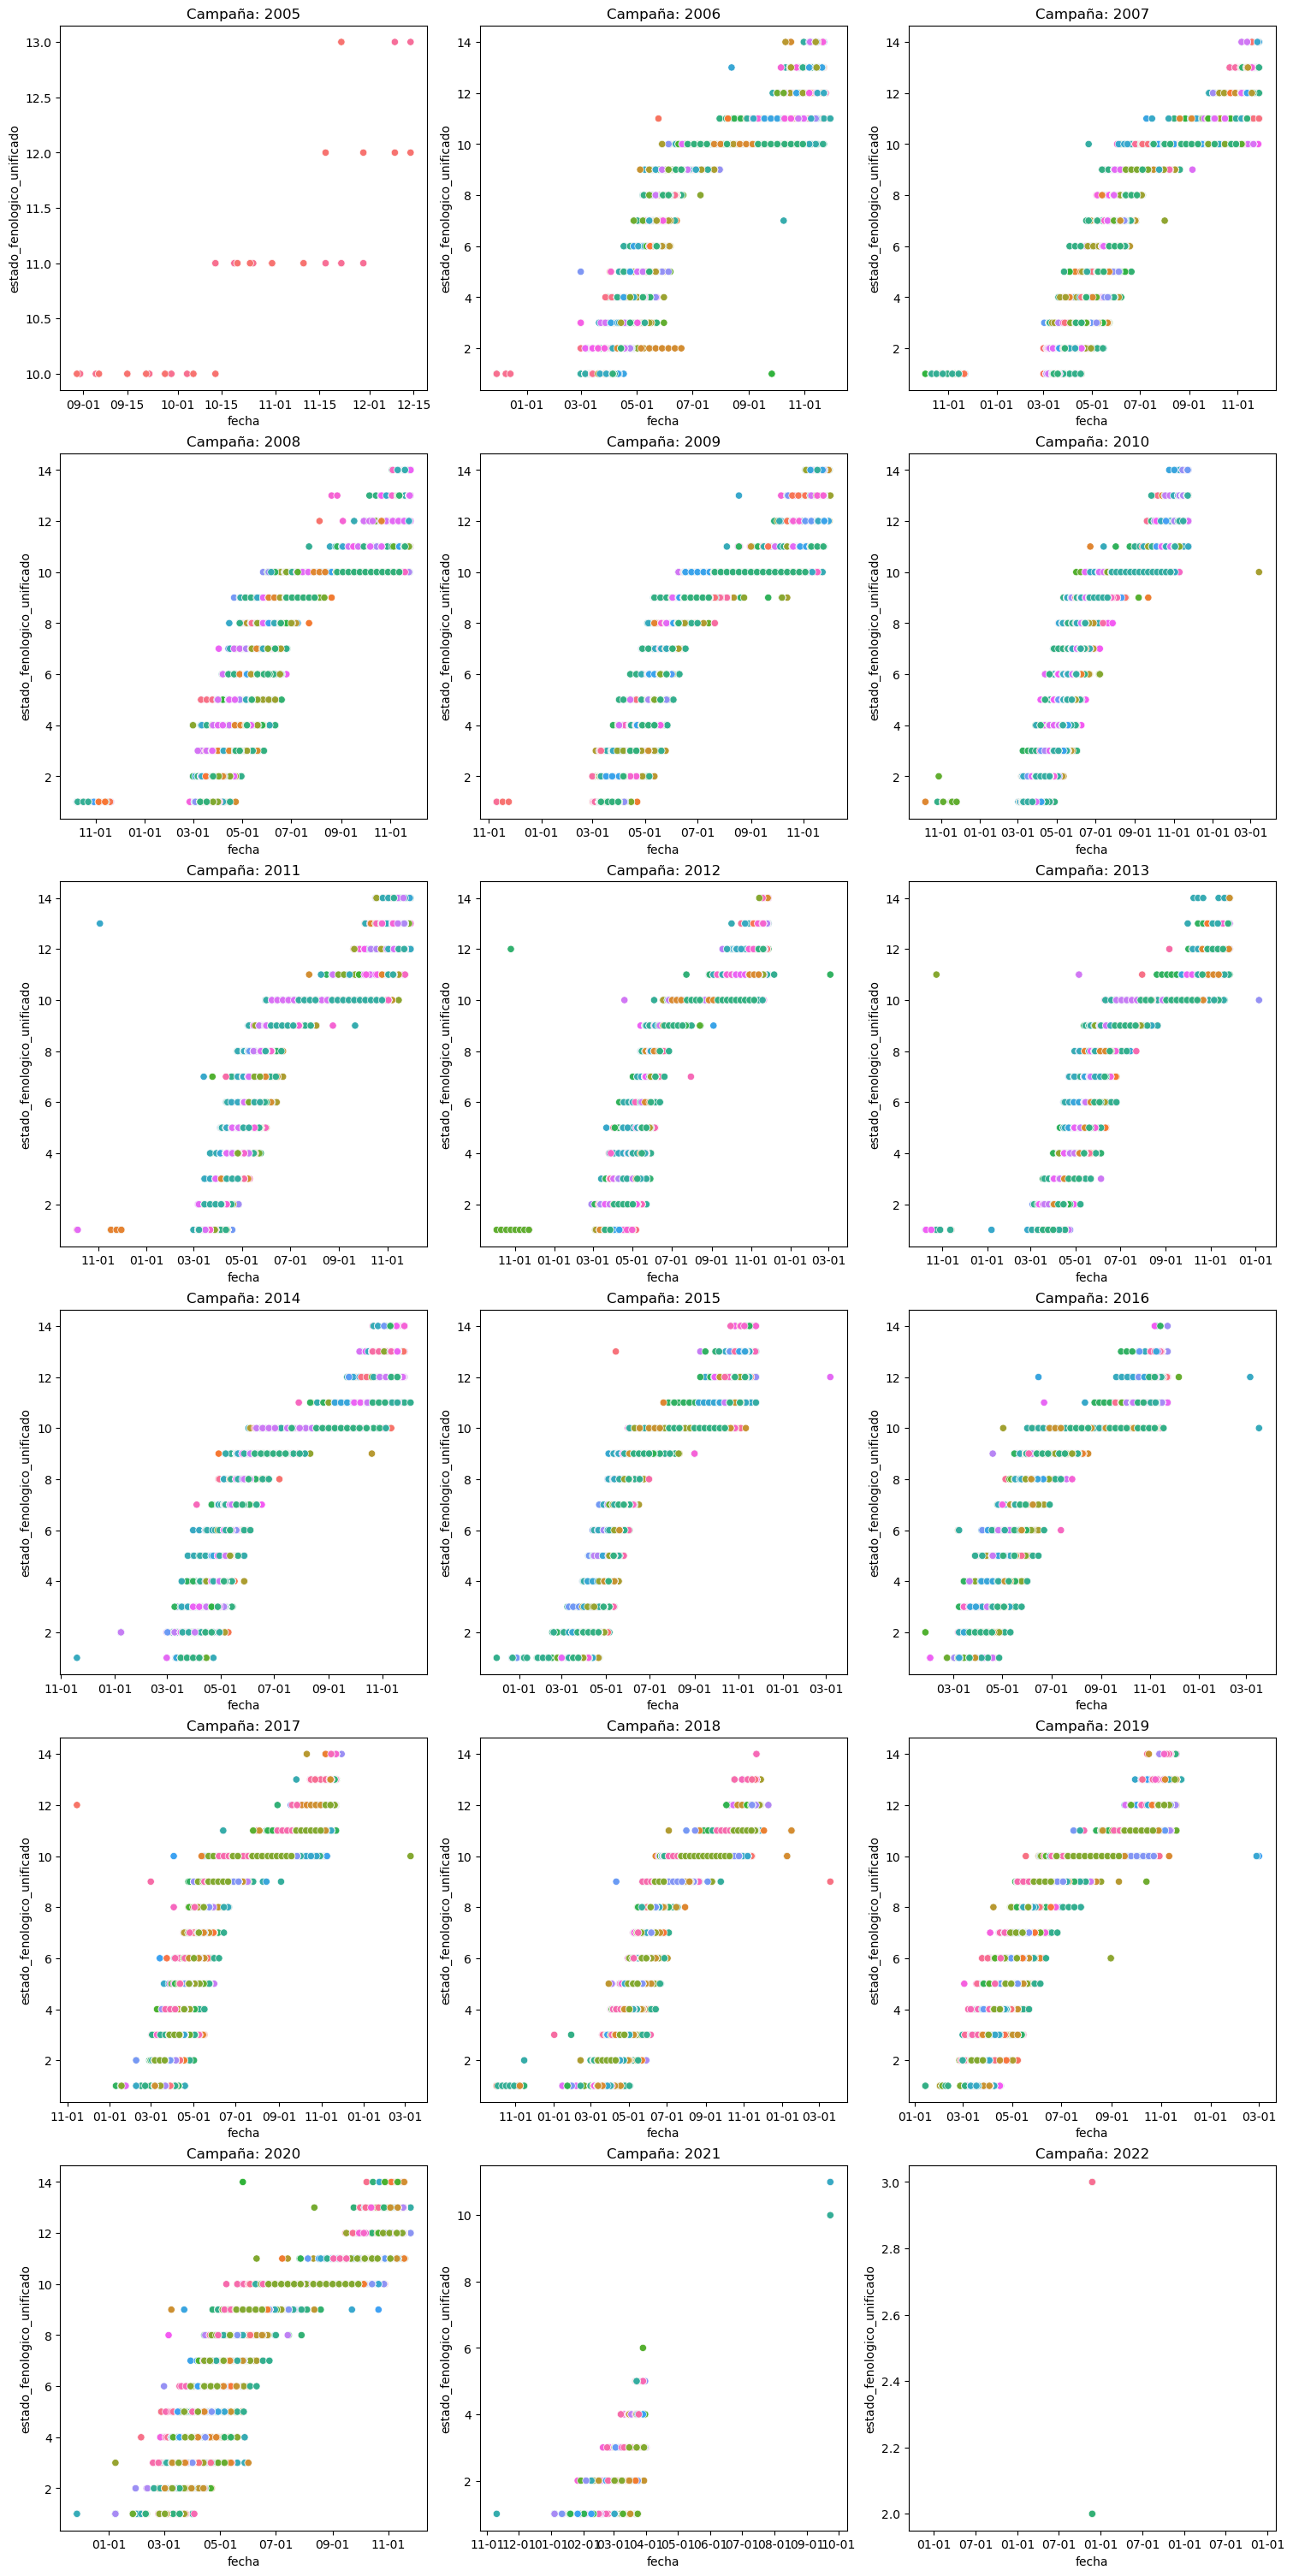

In [22]:
años_unicos = df['campaña'].unique()
n_años = len(años_unicos)
n_filas = np.ceil(n_años / 3).astype(int)  # Calcular número de filas necesarias

fig, axes = plt.subplots(n_filas, 3, figsize=(15, 5 * n_filas), constrained_layout=True)
axes = axes.flatten()  # Aplanar el array de ejes para facilitar su uso

for i, año in enumerate(sorted(años_unicos)):
    ax = axes[i]
    # Filtrar los datos por el año actual en la iteración
    datos_año = df[df['campaña'] == año]
    # Usar seaborn para el scatter plot
    sns.scatterplot(data=datos_año, x="fecha", y="estado_fenologico_unificado", hue="codparcela", legend=False, ax=ax)
    #sns.color_palette("Paired")
    ax.set_title(f'Campaña: {año}')
    # Formatear el eje x para mostrar solo el mes y día
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Esconder ejes no usados si el número de años no llena completamente la última fila
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

Podríamos dropear los años 2005, 2021 y 2022 ya que no disponemos de información para completar un ciclo entero de cosecha

## Estudio muestreo parcelas

### Número de muestreos

In [23]:
n_parcelas = df['codparcela'].nunique()
print('Número de parcelas únicas:', n_parcelas)

Número de parcelas únicas: 5150


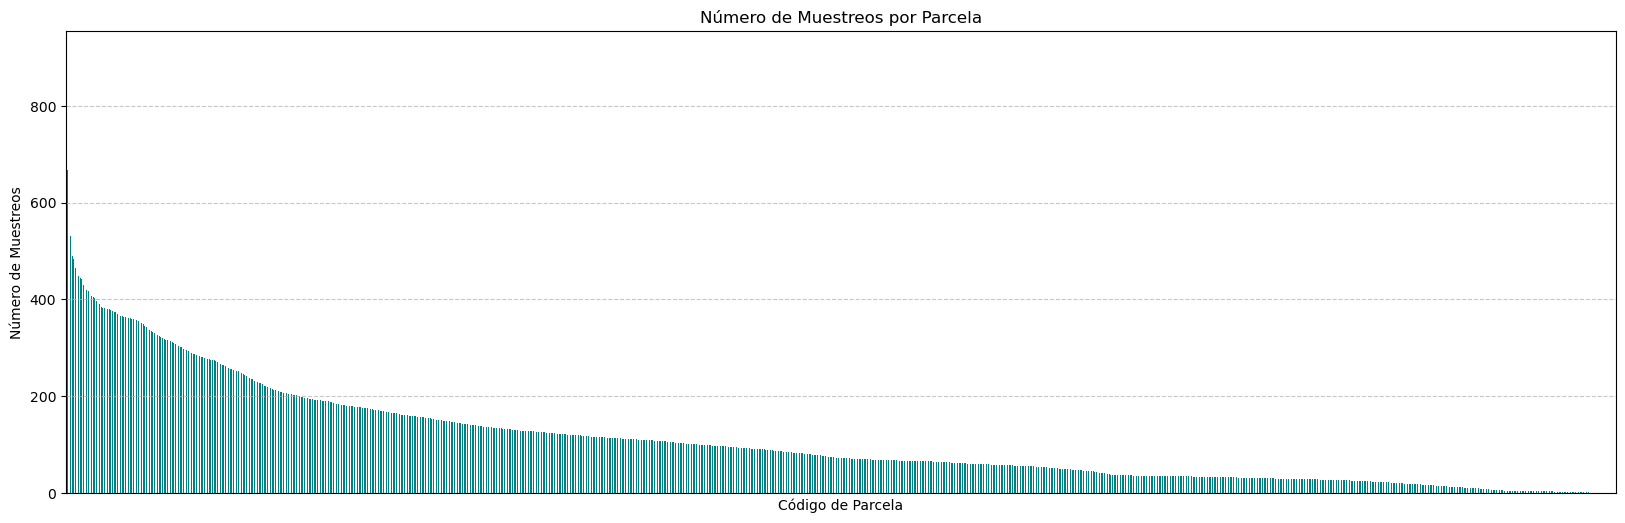

codparcela
015-00002-00-00    909
043-00008-00-00    811
017-00204-00-00    754
010-00016-00-00    721
004-00009-00-00    694
                  ... 
047-00179-02         0
093-00134-00-00      0
005-00078-00-00      0
005-00079-00-00      0
010-00002-00-H0      0
Name: count, Length: 5239, dtype: int64

In [24]:
# Análisis de muestreo por parcelas - contar el número de muestreos por cada parcela
muestreos_por_parcela = df['codparcela'].value_counts()

# Visualización de los muestreos por parcela
plt.figure(figsize=(20, 6))
muestreos_por_parcela.plot(kind='bar', color='teal')
plt.title('Número de Muestreos por Parcela')
plt.xlabel('Código de Parcela')
plt.ylabel('Número de Muestreos')
plt.xticks(ticks=[])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

muestreos_por_parcela

Vemos que hay parcelas considerablemente con más muestreos que otras. Vamos a indagar como se distribuye esto a lo largo de las campañas
En el dataframe vemos algunas parcelas que salen con un 0. Esto se debe a parcelas que hemos descartado por los motivos explicados arriba y por como guarda pandas la información siguen apareciendo. Las podemos obviar 

In [25]:
# Contar el número de muestreos por cada parcela agrupados por campaña
muestreos_por_parcela_y_campaña = df.groupby(['campaña', 'codparcela']).size().unstack(fill_value=0)
muestreos_por_parcela_y_campaña

C:\Users\alex1\AppData\Local\Temp\ipykernel_20552\3384821339.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  muestreos_por_parcela_y_campaña = df.groupby(['campaña', 'codparcela']).size().unstack(fill_value=0)


codparcela  000-00000-00  000-00000-00-0  000-00900-00-U0  000-00999-00-00  \
campaña                                                                      
2005                   0               0                0                0   
2006                   0               0               25               24   
2007                   0               0               30               30   
2008                   0               0               28               28   
2009                   0               0               30               29   
2010                   0               0                0                0   
2011                   0               0                0                0   
2012                   0               0                0                0   
2013                   0               0                0                0   
2014                   0               0                0                0   
2015                   2               4                0                0   
2016                   0               0                0                0   
2017                   0               0                0                0   
2018                   0               0                0                0   
2019                   0               0                0                0   
2020                   0               0                0                0   
2021                   0               0                0                0   
2022                   0               0                0                0   

codparcela  000-00999-00-FC  001-00001-00-06  001-00001-01  001-00002-00-00  \
campaña                                                                       
2005                      0                0             0                0   
2006                     24                0             0               13   
2007                      0                0             0               27   
2008                      0                0             0                0   
2009                      0                0             0                0   
2010                      0                0             0                0   
2011                      0                0             0                0   
2012                      0                6             0                0   
2013                      0                0             0                0   
2014                      0                0             0                0   
2015                      0                0             0                0   
2016                      0                0             0                0   
2017                      0                0            10                0   
2018                      0                0            27                0   
2019                      0                0            29                0   
2020                      0                0             8                0   
2021                      0                0             0                0   
2022                      0                0             0                0   

codparcela  001-00002-01  001-00003-00-00  ...  R-874  R-875  R-876  R-877  \
campaña                                    ...                               
2005                   0                0  ...      0      0      0      0   
2006                   0               28  ...      0      0      0      0   
2007                   0               19  ...      3      3      3      3   
2008                   0               36  ...      0      0      0      0   
2009                   0               36  ...      0      0      0      0   
2010                   0               37  ...      0      0      0      0   
2011                   0               37  ...      0      0      0      0   
2012                   0                0  ...      0      0      0      0   
2013                   0                0  ...      0      0      0      0   


Vemos parcelas como la 001-00004-00-00 con casi 100 muestreos por año. Lo cual no tiene mucho sentido ya que haciendo un muestreo semanal sacaríamos como máximo 52 muestras. Veamos con detalle esa parcela:

In [26]:
df[df['codparcela'] == '001-00004-00-00']

generated_muestreos       codparcela provincia         municipio  \
241524 2020-04-23 14:42:09  001-00004-00-00    huelva        villarrasa   
241525 2020-04-23 14:42:09  001-00004-00-00    huelva        villarrasa   
241526 2020-04-23 14:42:09  001-00004-00-00    huelva        villarrasa   
241527 2020-04-23 14:42:09  001-00004-00-00    huelva        villarrasa   
241528 2020-04-23 14:42:09  001-00004-00-00    huelva        villarrasa   
...                    ...              ...       ...               ...   
401655 2020-04-23 17:00:15  001-00004-00-00    malaga  fuente de piedra   
401656 2020-04-23 17:00:15  001-00004-00-00    malaga  fuente de piedra   
401657 2020-04-23 17:00:15  001-00004-00-00    malaga  fuente de piedra   
401659 2020-04-23 17:00:15  001-00004-00-00    malaga  fuente de piedra   
401660 2020-04-23 17:00:15  001-00004-00-00    malaga  fuente de piedra   

            fecha  campaña  poligono  parcela  recinto  subrecinto  ...  \
241524 2006-03-01     2006         1        4        0           0  ...   
241525 2006-03-28     2006         1        4        0           0  ...   
241526 2006-04-04     2006         1        4        0           0  ...   
241527 2006-04-11     2006         1        4        0           0  ...   
241528 2006-04-18     2006         1        4        0           0  ...   
...           ...      ...       ...      ...      ...         ...  ...   
401655 2009-10-19     2009         1        4        0           0  ...   
401656 2009-10-28     2009         1        4        0           0  ...   
401657 2009-11-04     2010         1        4        0           0  ...   
401659 2009-11-18     2010         1        4        0           0  ...   
401660 2009-11-25     2010         1        4        0           0  ...   

        108_u_h_c_a_la_que_pertenece  \
241524                           NaN   
241525                           NaN   
241526                           NaN   
241527                           NaN   
241528                           NaN   
...                              ...   
401655                           NaN   
401656                           NaN   
401657                           NaN   
401659                           NaN   
401660                           NaN   

        316_fecha_de_plantación_variedad_secundaria  \
241524                                   01/03/1994   
241525                                   01/03/1994   
241526                                   01/03/1994   
241527                                   01/03/1994   
241528                                   01/03/1994   
...                                             ...   
401655                                          NaN   
401656                                          NaN   
401657                                          NaN   
401659                                          NaN   
401660                                          NaN   

        315_patrón_variedad_secundaria  \
241524                         NINGUNA   
241525                         NINGUNA   
241526                         NINGUNA   
241527                         NINGUNA   
241528                         NINGUNA   
...                                ...   
401655                             NaN   
401656                             NaN   
401657                             NaN   
401659                             NaN   
401660                             NaN   

        317_%_superficie_ocupada_variedad_secundaria  306_altura_de_copa_(m)  \
241524                                          10.0                     NaN   
241525                                          10.0                     NaN   
241526                                          10.0                     NaN   
241527                                          10.0                     NaN   
241528                                          10.0                     NaN   
...                                              ...                     ...  

In [27]:
df[df['codparcela'] == '001-00004-00-00'][['codparcela','provincia']].drop_duplicates()

codparcela provincia
241524  001-00004-00-00    huelva
319504  001-00004-00-00      jaen
401534  001-00004-00-00    malaga

Vemos que se ha usado el mismo codparcela en tres parcelas distintas. Debido a que tanto codparcela como provincia no tienen nulos, usaremos esos 2 campos para generar un primary key

In [28]:
df['pkey'] = df['codparcela'].astype(str) + '_' + df['provincia'].astype(str)

# Repetimos el análisis
muestreos_por_parcela_y_campaña = df.groupby(['campaña', 'pkey']).size().unstack(fill_value=0)

In [29]:
muestreos_por_parcela_y_campaña

pkey     000-00000-00-0_cadiz  000-00000-00_cadiz  000-00900-00-U0_granada  \
campaña                                                                      
2005                        0                   0                        0   
2006                        0                   0                       25   
2007                        0                   0                       30   
2008                        0                   0                       28   
2009                        0                   0                       30   
2010                        0                   0                        0   
2011                        0                   0                        0   
2012                        0                   0                        0   
2013                        0                   0                        0   
2014                        0                   0                        0   
2015                        4                   2                        0   
2016                        0                   0                        0   
2017                        0                   0                        0   
2018                        0                   0                        0   
2019                        0                   0                        0   
2020                        0                   0                        0   
2021                        0                   0                        0   
2022                        0                   0                        0   

pkey     000-00999-00-00_granada  000-00999-00-FC_granada  \
campaña                                                     
2005                           0                        0   
2006                          24                       24   
2007                          30                        0   
2008                          28                        0   
2009                          29                        0   
2010                           0                        0   
2011                           0                        0   
2012                           0                        0   
2013                           0                        0   
2014                           0                        0   
2015                           0                        0   
2016                           0                        0   
2017                           0                        0   
2018                           0                        0   
2019                           0                        0   
2020                           0                        0   
2021                           0                        0   
2022                           0                        0   

pkey     001-00001-00-06_granada  001-00001-01_jaen  001-00002-00-00_cordoba  \
campaña                                                                        
2005                           0                  0                        0   
2006                           0                  0                       13   
2007                           0                  0                       27   
2008                           0                  0                        0   
2009                           0                  0                        0   
2010                           0                  0                        0   
2011                           0                  0                        0   
2012                           6                  0                        0   
2013                           0                  0                        0   
2014                           0                  0                        0   
2015                           0                  0                        0   
2016                           0                  0                        0   
2017                           0                 10                        0   
2018              

Vamos a eliminar aquellas muestras de parcelas que aparecen sólo 1 vez en un año. Aunque hay otra potenciales candidatas (aparecen 2-6 veces en una campaña), vamos a esperar a analizar la separación del muestreo para esos casos.

In [30]:
# Contar cuántas veces cada parcela aparece por campaña
parcela_counts = df.groupby(['campaña', 'pkey']).size().reset_index().rename({0:'count_muestras_campaña'},axis=1)

# Join al df principal con la nueva columna
df = df.merge(parcela_counts, how='left', on=['campaña','pkey']).sort_values(by=['pkey','campaña'])

# Filtramos casos con pocas muestras
df = df[df['count_muestras_campaña'] > 1]

C:\Users\alex1\AppData\Local\Temp\ipykernel_20552\1251433875.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  parcelas_por_bucket = df.groupby(['campaña', 'bucket'])['pkey'].nunique().unstack(fill_value=0)
C:\Users\alex1\AppData\Local\Temp\ipykernel_20552\1251433875.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(labels, rotation=45)
C:\Users\alex1\AppData\Local\Temp\ipykernel_20552\1251433875.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(labels, rotation=45)
C:\Users\alex1\AppData\Local\Temp\ipykernel_20552\1251433875.py:25: UserWarning: set_ticklabels() should only be us

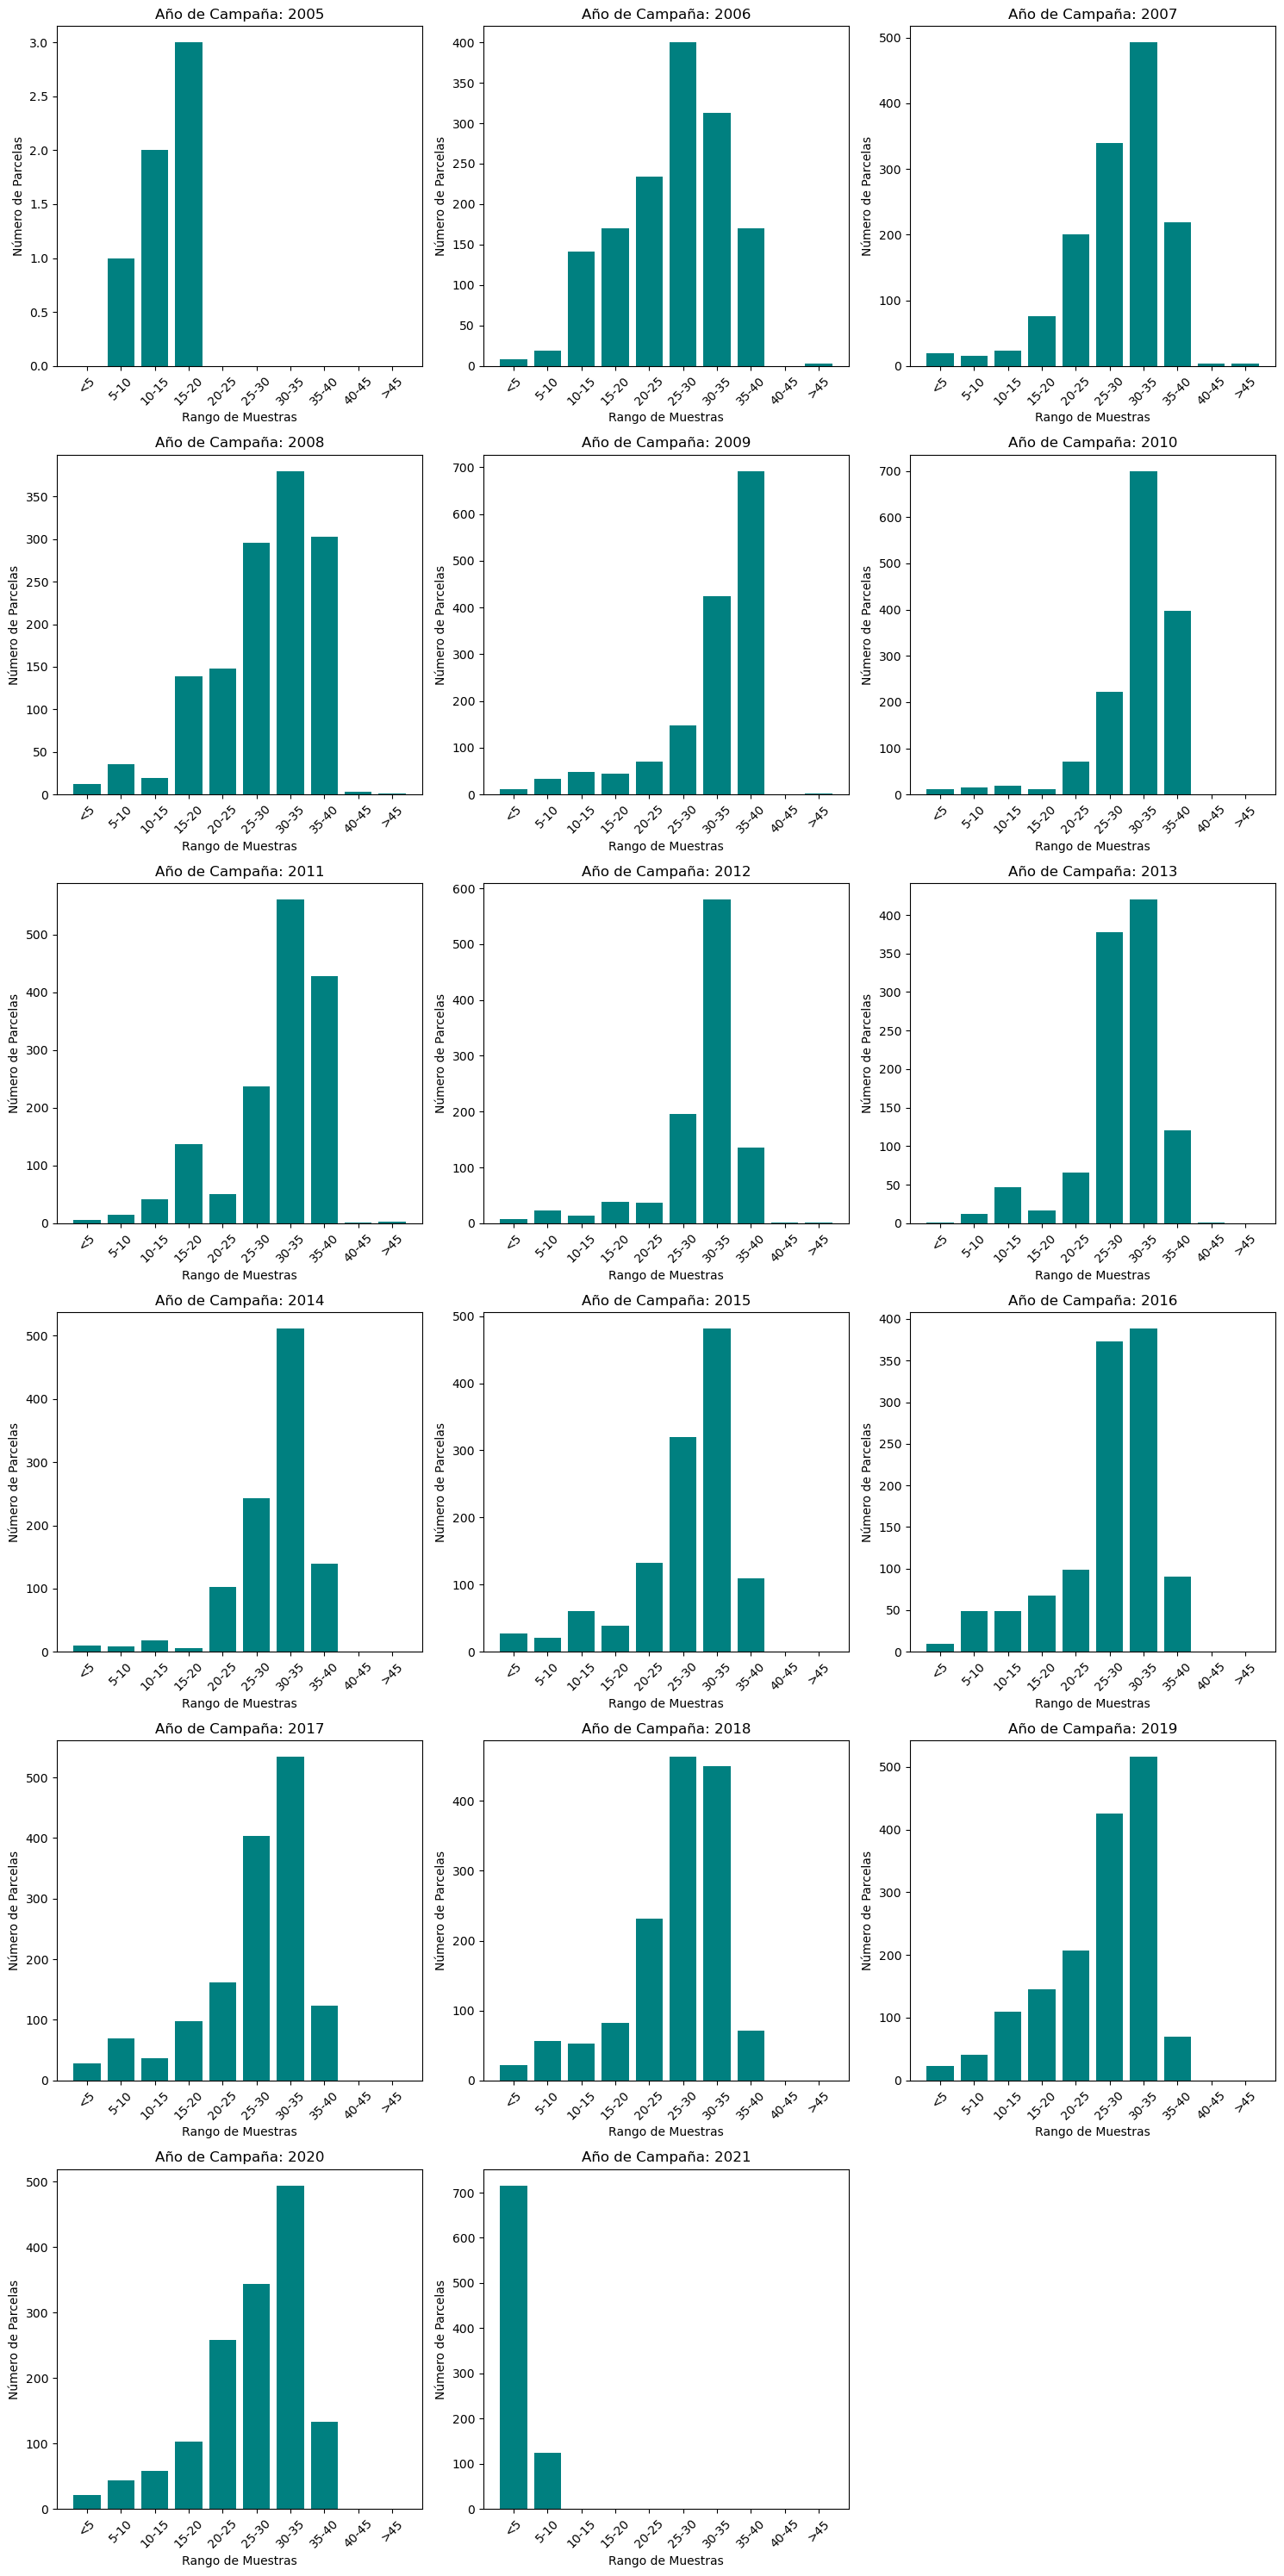

In [31]:
### Plot por buckets según el número de muestras

# Crear los buckets de conteo de muestras
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]  # Puedes ajustar los límites superiores según tus datos
labels = ['<5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '>45']
df['bucket'] = pd.cut(df['count_muestras_campaña'], bins=bins, labels=labels, right=False)

# Agrupar por campaña y bucket para contar parcelas en cada bucket
parcelas_por_bucket = df.groupby(['campaña', 'bucket'])['pkey'].nunique().unstack(fill_value=0)

# Número de filas y columnas para las subfiguras
n_cols = 3
n_rows = int(np.ceil(len(parcelas_por_bucket) / n_cols))

# Crear las subfiguras
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axs = axs.flatten()  # Aplanar el array de ejes si es multidimensional

# Llenar cada subfigura
for i, (year, data) in enumerate(parcelas_por_bucket.iterrows()):
    axs[i].bar(data.index, data, color='teal')
    axs[i].set_title(f'Año de Campaña: {year}')
    axs[i].set_xlabel('Rango de Muestras')
    axs[i].set_ylabel('Número de Parcelas')
    axs[i].set_xticklabels(labels, rotation=45)

# Esconder ejes no utilizados
for ax in axs[i+1:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

### Espaciado entre muestreos

Deberíamos buscar muestreos con una frecuencia al menos de 2 semanas ya que es el intervalo temporal que queremos predecir.

In [32]:
# Ordenar los datos por parcela y por fecha para calcular los espaciados de muestreo
df = df.sort_values(by=['pkey', 'fecha'])

df['diferencia_dias'] = df.groupby(['pkey', 'campaña'], as_index=False)['fecha'].diff().dt.days

df['diferencia_dias'] = df['diferencia_dias'].fillna(0)

C:\Users\alex1\AppData\Local\Temp\ipykernel_20552\2305354928.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  parcelas_por_bucket_d = df.groupby(['campaña', 'bucket_d'])['pkey'].nunique().unstack(fill_value=0)
C:\Users\alex1\AppData\Local\Temp\ipykernel_20552\2305354928.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(labels, rotation=45)
C:\Users\alex1\AppData\Local\Temp\ipykernel_20552\2305354928.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(labels, rotation=45)
C:\Users\alex1\AppData\Local\Temp\ipykernel_20552\2305354928.py:25: UserWarning: set_ticklabels() should only b

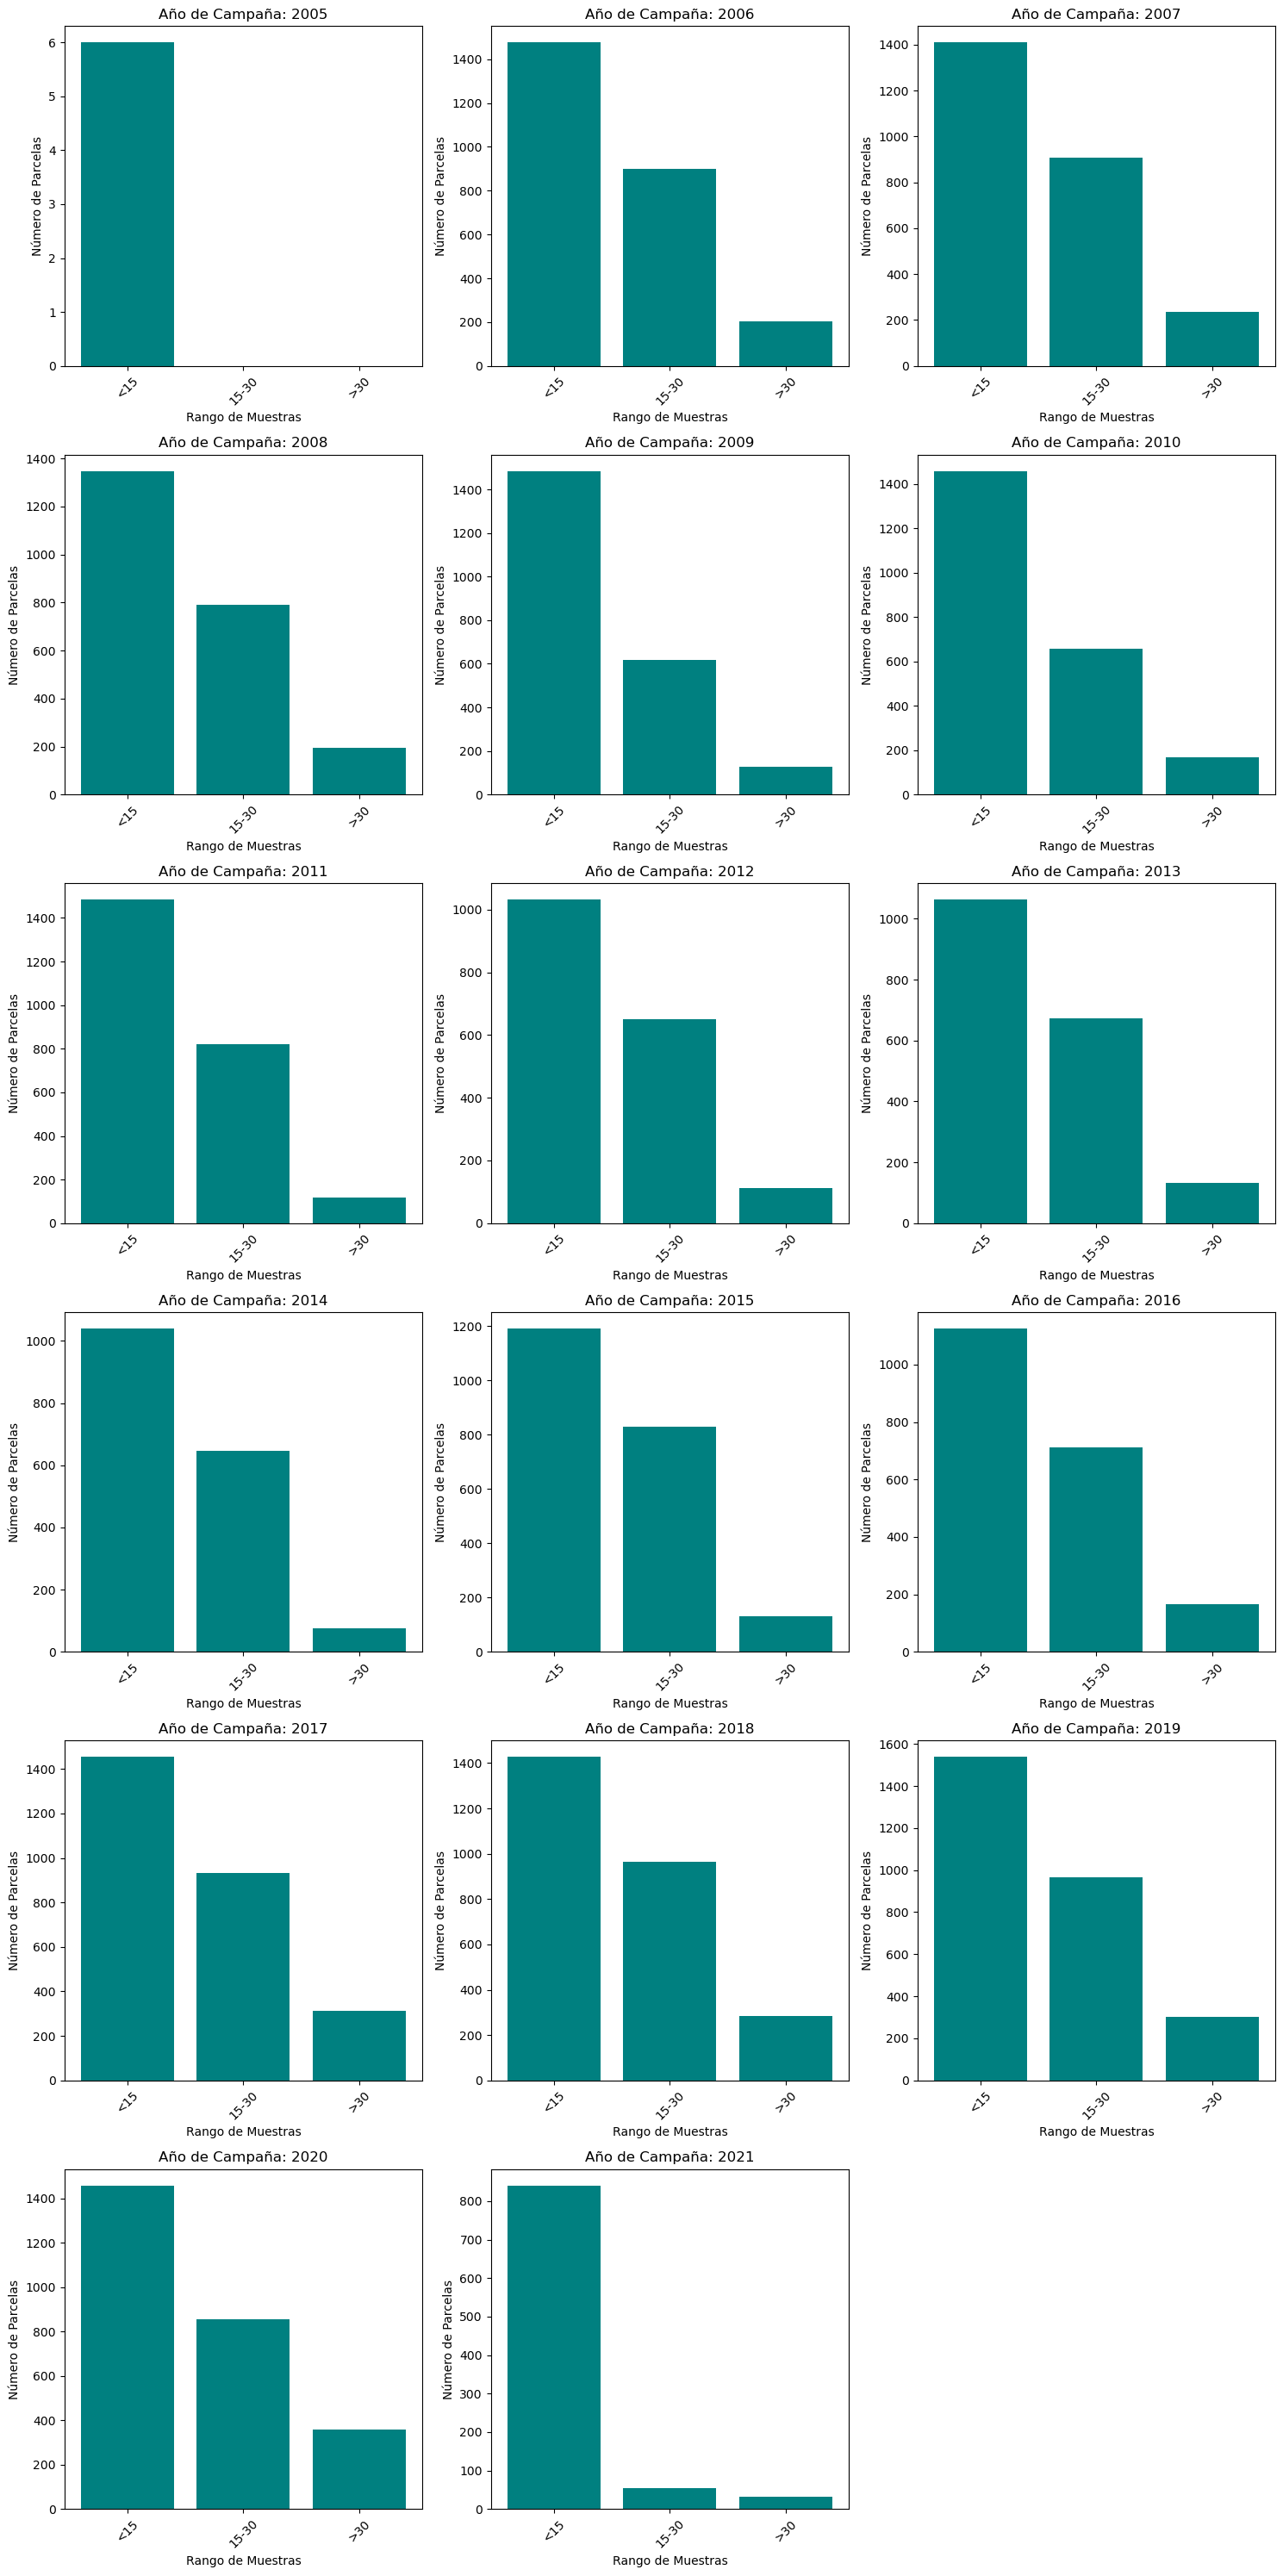

In [33]:
### Plot por buckets según el espaciado de muestreo

# Crear los buckets de conteo de muestras
bins = [0, 15, 30, 365]  # Puedes ajustar los límites superiores según tus datos
labels = ['<15', '15-30','>30']
df['bucket_d'] = pd.cut(df['diferencia_dias'], bins=bins, labels=labels, right=False)

# Agrupar por campaña y bucket para contar parcelas en cada bucket
parcelas_por_bucket_d = df.groupby(['campaña', 'bucket_d'])['pkey'].nunique().unstack(fill_value=0)

# Número de filas y columnas para las subfiguras
n_cols = 3
n_rows = int(np.ceil(len(parcelas_por_bucket_d) / n_cols))

# Crear las subfiguras
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axs = axs.flatten()  # Aplanar el array de ejes si es multidimensional

# Llenar cada subfigura
for i, (year, data) in enumerate(parcelas_por_bucket_d.iterrows()):
    axs[i].bar(data.index, data, color='teal')
    axs[i].set_title(f'Año de Campaña: {year}')
    axs[i].set_xlabel('Rango de Muestras')
    axs[i].set_ylabel('Número de Parcelas')
    axs[i].set_xticklabels(labels, rotation=45)

# Esconder ejes no utilizados
for ax in axs[i+1:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

Seguramente las muestras de más de 30 las podamos eliminar. Qué parcelas tienen pocas muestras y encima muy espaciadas? Filtrar sólo esas y tratarlas

In [34]:
df[(df['count_muestras_campaña'] <= 10) & (df['bucket_d'] == '>30')]

generated_muestreos       codparcela provincia       municipio  \
16608  2020-04-23 14:31:50   000-00000-00-0     cadiz     villamartin   
3894   2020-04-23 14:31:50     000-00000-00     cadiz     algodonales   
414039 2021-04-05 17:26:06  001-00013-01-00     cadiz  puerto serrano   
445940 2021-04-05 17:26:06  001-00021-06-08   granada       chimeneas   
445945 2021-04-05 17:26:06  001-00021-06-08   granada       chimeneas   
...                    ...              ...       ...             ...   
46709  2020-04-23 14:34:36            R-875   cordoba       bujalance   
46712  2020-04-23 14:34:36            R-876   cordoba       bujalance   
46715  2020-04-23 14:34:36            R-877   cordoba       bujalance   
46718  2020-04-23 14:34:36            R-878   cordoba       bujalance   
46721  2020-04-23 14:34:36            R-879   cordoba       bujalance   

            fecha  campaña  poligono  parcela  recinto  subrecinto  ...  \
16608  2015-09-28     2015         0        0        0           0  ...   
3894   2015-09-30     2015         0        0        0        <NA>  ...   
414039 2017-10-03     2017         1       13        1           0  ...   
445940 2017-09-18     2017         1       21        6           8  ...   
445945 2018-05-22     2018         1       21        6           8  ...   
...           ...      ...       ...      ...      ...         ...  ...   
46709  2007-10-29     2007      <NA>      875     <NA>        <NA>  ...   
46712  2007-10-29     2007      <NA>      876     <NA>        <NA>  ...   
46715  2007-10-29     2007      <NA>      877     <NA>        <NA>  ...   
46718  2007-10-31     2007      <NA>      878     <NA>        <NA>  ...   
46721  2007-10-31     2007      <NA>      879     <NA>        <NA>  ...   

        310_patrón_variedad_principal  411_representa_a_la_u_h_c_(si/no)  \
16608                             NaN                                NaN   
3894                              NaN                                NaN   
414039                            NaN                                NaN   
445940                            NaN                                NaN   
445945                            NaN                                NaN   
...                               ...                                ...   
46709                             NaN                                NaN   
46712                             NaN                                NaN   
46715                             NaN                                NaN   
46718                             NaN                                NaN   
46721                             NaN                                NaN   

        109_sistema_para_el_cumplimiento_gestión_integrada  \
16608                                                 NaN    
3894                                                  NaN    
414039                          Producción Integrada (PI)    
445940                                                NaN    
445945                                                NaN    
...                                                   ...    
46709                                                 NaN    
46712                                                 NaN    
46715                                                 NaN    
46718                                                 NaN    
46721                                                 NaN    

        estado_fenologico_unificado  num_2s                     pkey  \
16608                          11.0       1     000-00000-00-0_cadiz   
3894                           11.0       1       000-00000-00_cadiz   
414039                         12.0       1    001-00013-01-00_cadiz   
445940                         10.0       1  001-00021-06-08_granada   
445945                          4.0       1  001-00021-06-08_granada   
...                             ...     ...                      ...   
46709                          12.0       1            R-875_cordob

In [35]:
# Estadísticas descriptivas por parcela
stats_by_parcela_anyo = df.groupby(['campaña','pkey'])['diferencia_dias'].agg(['mean', 'median', 'std', 'min', 'max']).dropna()
stats_by_parcela_anyo

mean  median       std  min   max
campaña pkey                                                          
2005    001-00162-00-00_malaga   6.625000     7.0  2.473190  0.0  10.0
        001-00163-00-00_malaga   6.625000     7.0  2.473190  0.0  10.0
        011-00001-00-00_malaga   6.000000     6.0  2.549510  0.0   9.0
        110-00004-00-00_malaga   6.562500     6.5  2.421260  0.0  10.0
        128-00013-00-00_malaga   6.428571     7.0  2.277458  0.0  10.0
...                                   ...     ...       ...  ...   ...
2021    139-00018-03-00_sevilla  5.250000     7.0  3.500000  0.0   7.0
        139-00019-01-00_sevilla  7.000000     7.0  7.000000  0.0  14.0
        142-00031-01-00_sevilla  7.000000     7.0  7.000000  0.0  14.0
        146-00054-06-00_sevilla  7.000000     7.0  7.000000  0.0  14.0
        501-00275-02-00_granada  4.500000     4.5  6.363961  0.0   9.0

[20846 rows x 5 columns]

In [36]:
stats_by_parcela_anyo.reset_index().sort_values(by=['std'])

campaña                     pkey        mean  median         std  min  \
221       2006  004-00020-00-00_cordoba    3.507246     3.0    1.093069  0.0   
5093      2009  017-00251-00-00_cordoba    6.815789     7.0    1.135550  0.0   
3184      2008  006-00019-00-00_cordoba    6.815789     7.0    1.135550  0.0   
8090      2011  020-00003-00-00_cordoba    6.815789     7.0    1.135550  0.0   
4690      2009  008-00032-00-00_cordoba    6.815789     7.0    1.135550  0.0   
...        ...                      ...         ...     ...         ...  ...   
2885      2007            R-872_cordoba   76.666667    13.0  121.705930  0.0   
2884      2007            R-871_cordoba   76.666667    13.0  121.705930  0.0   
2892      2007            R-879_cordoba   77.666667    15.0  121.763432  0.0   
2883      2007            R-870_cordoba   77.000000     8.0  126.502964  0.0   
19819     2020        045-00202-02_jaen  102.500000   102.5  144.956890  0.0   

         max  
221      7.0  
5093     7.0  
3184     7.0  
8090     7.0  
4690     7.0  
...      ...  
2885   217.0  
2884   217.0  
2892   218.0  
2883   223.0  
19819  205.0  

[20846 rows x 7 columns]

In [37]:
stats_by_parcela_anyo.reset_index().sort_values(by=['std']).tail(20)

campaña                    pkey        mean  median         std  min  \
16781     2018    041-00001-01-98_jaen   40.250000     7.0   71.243128  0.0   
16736     2018    036-00394-01-75_jaen   40.250000     7.0   71.243128  0.0   
16543     2018    022-00248-01-25_jaen   40.250000     7.0   71.243128  0.0   
16529     2018    021-00237-01-33_jaen   40.250000     7.0   71.243128  0.0   
16295     2018    013-00072-01-17_jaen   40.250000     7.0   71.243128  0.0   
16570     2018    024-00007-01-94_jaen   40.250000     7.0   71.243128  0.0   
16656     2018    030-00005-02-11_jaen   40.250000     7.0   71.243128  0.0   
8668      2011           C-751_cordoba   39.833333     6.5   83.535422  0.0   
2968      2008  002-00082-00-00_malaga   62.000000     8.0  115.071717  0.0   
2888      2007           R-875_cordoba   77.000000    16.0  119.778963  0.0   
2887      2007           R-874_cordoba   77.000000    15.0  120.610945  0.0   
2889      2007           R-876_cordoba   76.666667    14.0  120.869075  0.0   
2890      2007           R-877_cordoba   76.666667    14.0  120.869075  0.0   
2891      2007           R-878_cordoba   77.333333    15.0  121.187183  0.0   
2886      2007           R-873_cordoba   76.666667    13.0  121.705930  0.0   
2885      2007           R-872_cordoba   76.666667    13.0  121.705930  0.0   
2884      2007           R-871_cordoba   76.666667    13.0  121.705930  0.0   
2892      2007           R-879_cordoba   77.666667    15.0  121.763432  0.0   
2883      2007           R-870_cordoba   77.000000     8.0  126.502964  0.0   
19819     2020       045-00202-02_jaen  102.500000   102.5  144.956890  0.0   

         max  
16781  147.0  
16736  147.0  
16543  147.0  
16529  147.0  
16295  147.0  
16570  147.0  
16656  147.0  
8668   210.0  
2968   267.0  
2888   215.0  
2887   216.0  
2889   216.0  
2890   216.0  
2891   217.0  
2886   217.0  
2885   217.0  
2884   217.0  
2892   218.0  
2883   223.0  
19819  205.0

In [38]:
df[(df['campaña'] == 2008) & (df['pkey'] == '002-00082-00-00_malaga')]

generated_muestreos       codparcela provincia   municipio      fecha  \
399849 2020-04-23 17:00:15  002-00082-00-00    malaga  montejaque 2007-11-05   
399850 2020-04-23 17:00:15  002-00082-00-00    malaga  montejaque 2007-11-13   
399851 2020-04-23 17:00:15  002-00082-00-00    malaga  montejaque 2008-08-06   
399852 2020-04-23 17:00:15  002-00082-00-00    malaga  montejaque 2008-08-13   
399853 2020-04-23 17:00:15  002-00082-00-00    malaga  montejaque 2008-09-10   

        campaña  poligono  parcela  recinto  subrecinto  ...  \
399849     2008         2       82        0           0  ...   
399850     2008         2       82        0           0  ...   
399851     2008         2       82        0           0  ...   
399852     2008         2       82        0           0  ...   
399853     2008         2       82        0           0  ...   

        310_patrón_variedad_principal  411_representa_a_la_u_h_c_(si/no)  \
399849                        NINGUNO                                NaN   
399850                        NINGUNO                                NaN   
399851                        NINGUNO                                NaN   
399852                        NINGUNO                                NaN   
399853                        NINGUNO                                NaN   

        109_sistema_para_el_cumplimiento_gestión_integrada  \
399849                                                NaN    
399850                                                NaN    
399851                                                NaN    
399852                                                NaN    
399853                                                NaN    

        estado_fenologico_unificado  num_2s                    pkey  \
399849                          1.0       1  002-00082-00-00_malaga   
399850                          1.0       1  002-00082-00-00_malaga   
399851                         10.0       1  002-00082-00-00_malaga   
399852                         10.0       1  002-00082-00-00_malaga   
399853                         10.0       1  002-00082-00-00_malaga   

        count_muestras_campaña  bucket  diferencia_dias  bucket_d  
399849                       5    5-10              0.0       <15  
399850                       5    5-10              8.0       <15  
399851                       5    5-10            267.0       >30  
399852                       5    5-10              7.0       <15  
399853                       5    5-10             28.0     15-30  

[5 rows x 68 columns]

## Estudio variables categóricas

Columna: codparcela
Porcentaje de valores nulos: 0.00%
Valores únicos 5068 

codparcela
015-00002-00-00    908
043-00008-00-00    811
017-00204-00-00    754
010-00016-00-00    721
004-00009-00-00    694
                  ... 
012-00007-00-M0      0
011-00350-01         0
099-00991-00-99      0
099-00992-00-99      0
010-00002-00-H0      0
Name: count, Length: 5239, dtype: int64


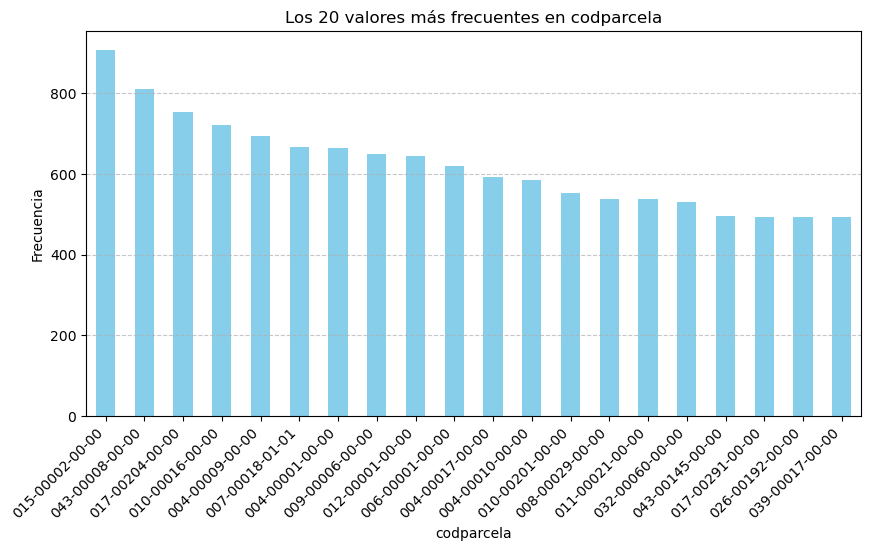

------------------------------------------------------------------------------------------------------------------------------
Columna: provincia
Porcentaje de valores nulos: 0.00%
Valores únicos 8 

provincia
jaen       158033
granada    134799
cordoba    134122
malaga      65072
sevilla     44349
cadiz       19874
huelva       7902
almeria      2760
Name: count, dtype: Int64


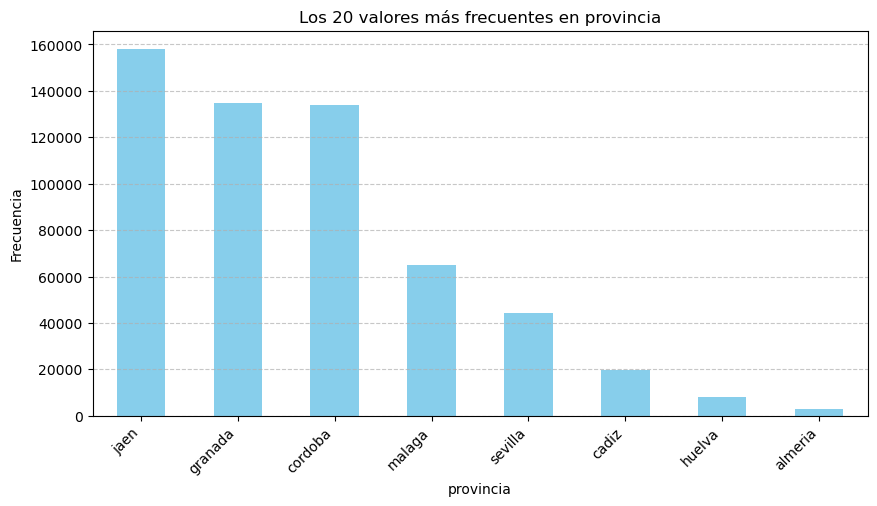

------------------------------------------------------------------------------------------------------------------------------
Columna: municipio
Porcentaje de valores nulos: 0.00%
Valores únicos 326 

municipio
ubeda           25249
loja            18793
antequera       17362
iznalloz        16741
puente genil    15830
                ...  
espeluy            12
olivares           10
alamedilla          7
oria                6
turrillas           2
Name: count, Length: 326, dtype: Int64


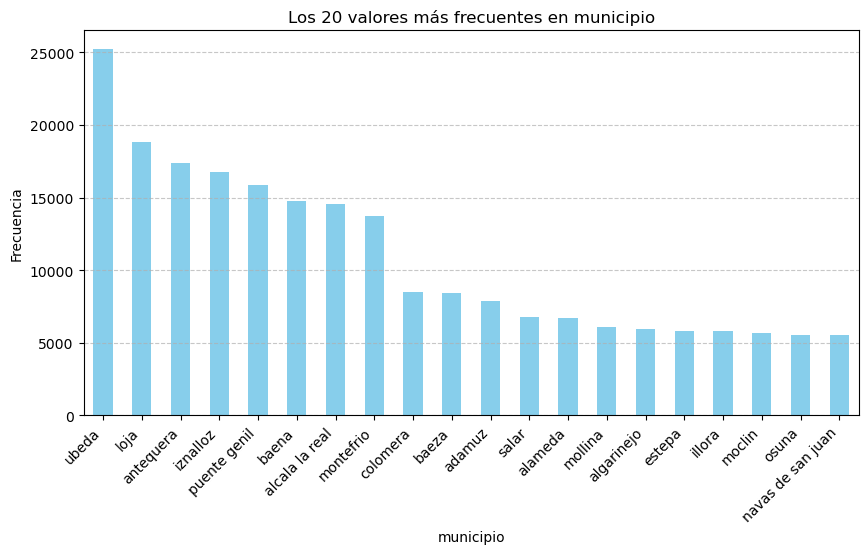

------------------------------------------------------------------------------------------------------------------------------
Columna: 105_comarca
Porcentaje de valores nulos: 0.67%
Valores únicos 63 

105_comarca
NORTE O ANTEQUERA          59886
LA LOMA                    50904
IZNALLOZ                   46746
DE LA  VEGA                37653
CAMPIÑA ALTA               32847
                           ...  
CAMPIÑA DE CADIZ - II        216
ANDEVALO OCCIDENTAL          201
MONTES ORIENTALES            181
CAMPIÑA DEL NORTE - III      116
LA SIERRA NORTE - II         109
Name: count, Length: 63, dtype: int64


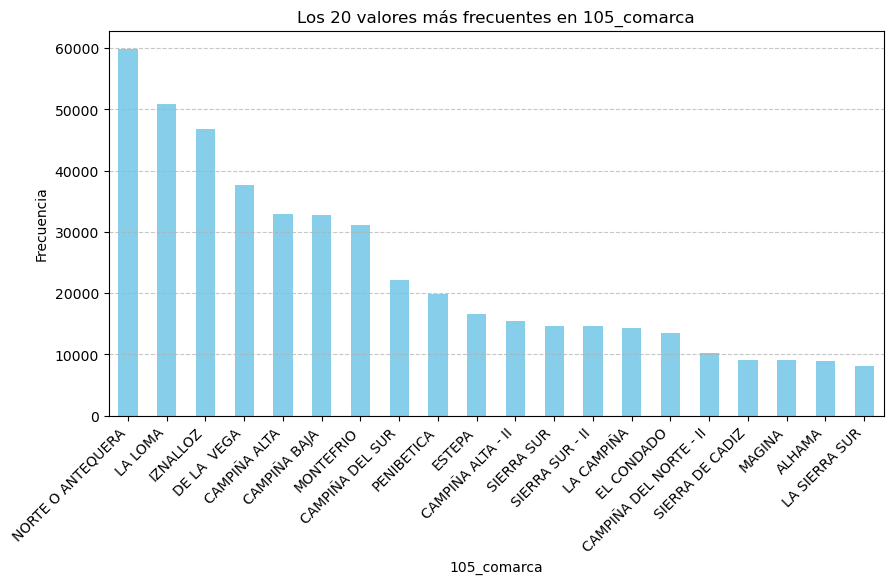

------------------------------------------------------------------------------------------------------------------------------
Columna: 203_orientación
Porcentaje de valores nulos: 57.97%
Valores únicos 36 

203_orientación
N              22339
S              22238
2 - NE         19496
1 - N          16937
4 - SE         16470
5 - S          15910
SE             14996
NE             12261
3 - E          10871
NO             10773
0 - Llana      10058
8 - NO          9763
E               9539
6 - SO          9301
7 - O           8403
9 - Varias      6827
O               6305
SO              5824
LLANO           2729
N-S             1456
X               1394
EO               765
1/2 N 1/2 S      715
LL               606
LLANA            507
ESTE             378
NS               311
E-NE             196
E-O              166
SIN DEFINIR      145
SUROESTE         140
N-E              132
llano             83
SUR ESTE          73
SURESTE           73
N-O               69
Name: count, dtype: 

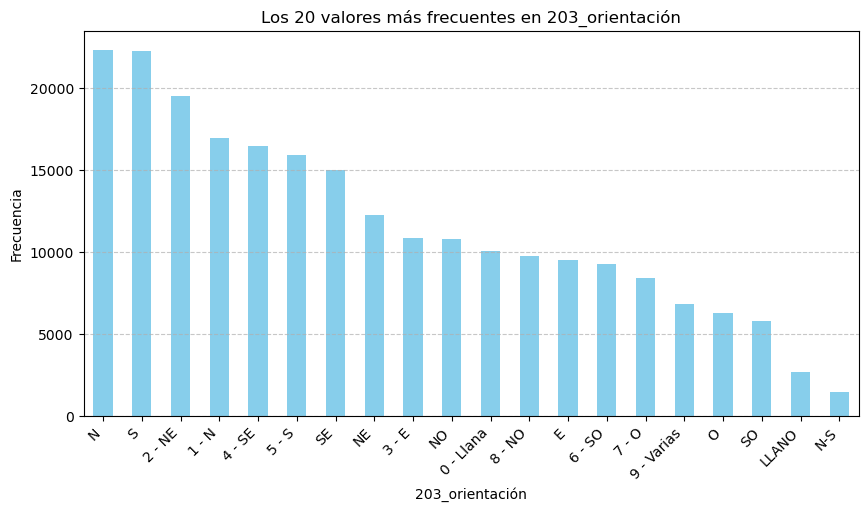

------------------------------------------------------------------------------------------------------------------------------
Columna: 204_textura_del_suelo
Porcentaje de valores nulos: 54.67%
Valores únicos 45 

204_textura_del_suelo
FRANCO-ARCILLOSO                                      50559
ARCILLO-ARENOSO                                       25788
FRANCO                                                23937
FRANCO-ARENOSO                                        21989
ARCILLOSO                                             20323
Franco-arcilloso                                      17170
FRANCO-ARCILLO-ARENOSO                                12951
ARCILLO-LIMOSO                                         9530
Calizas y margas (localmente areniscas o radiolari     9458
FRANCO-ARCILLO-LIMOSO                                  7424
ARENO-FRANCO                                           6853
Franco                                                 5195
Areno-franco                                

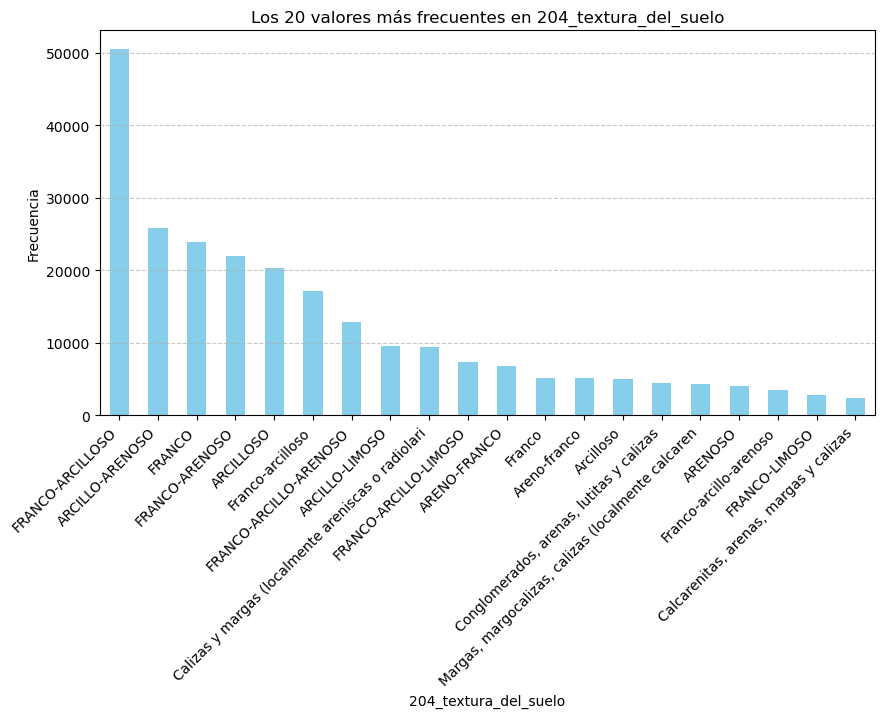

------------------------------------------------------------------------------------------------------------------------------
Columna: 206_secano_/_regadío
Porcentaje de valores nulos: 11.69%
Valores únicos 11 

206_secano_/_regadío
SECANO                       223350
REGADÍO                      130558
Secano                        75083
Regadío                       44301
RIEGO DE APOYO                19542
Riego de apoyo                 4664
REGADIO                        2205
SECANO CON RIEGO DE APOYO       402
RIEGO                           386
RlEGO                           122
Regadio                          41
Name: count, dtype: int64


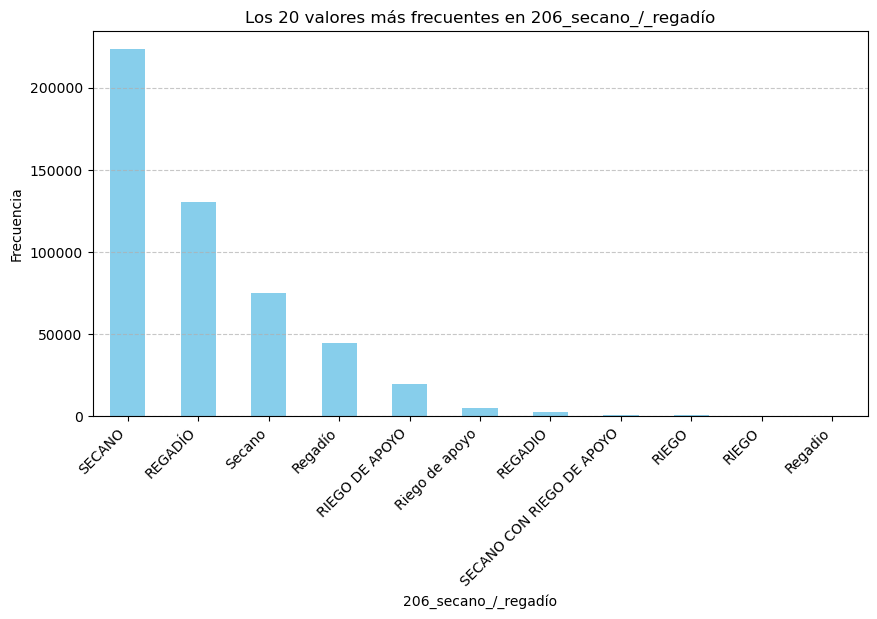

------------------------------------------------------------------------------------------------------------------------------
Columna: 211_utilización_de_cubierta_vegetal
Porcentaje de valores nulos: 27.66%
Valores únicos 4 

211_utilización_de_cubierta_vegetal
Si    192696
NO     86767
No     76537
SI     54102
Name: count, dtype: int64


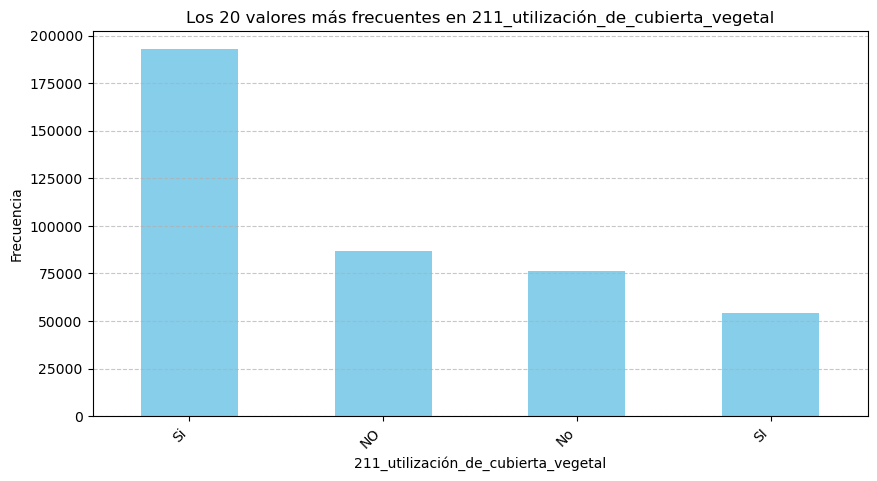

------------------------------------------------------------------------------------------------------------------------------
Columna: 212_tipo_de_cubierta_vegetal
Porcentaje de valores nulos: 56.28%
Valores únicos 28 

212_tipo_de_cubierta_vegetal
Silvestre                                           158617
SILVESTRE FORMADA CON HERBICIDA                      40760
ESPONTANEA                                           14632
Inerte ( restos poda, ..)                            13180
SILVESTRE FORMADA CON LABORES                         8318
Instalada con siembra                                 2744
INSTALADA CON SIEMBRA                                 2279
INERTE (RESTOS DE PODA)                               1369
NO                                                    1271
NATURAL                                               1223
NINGUNA                                                921
SILVESTRE                                              379
CONTROLADA CON GANADO                     

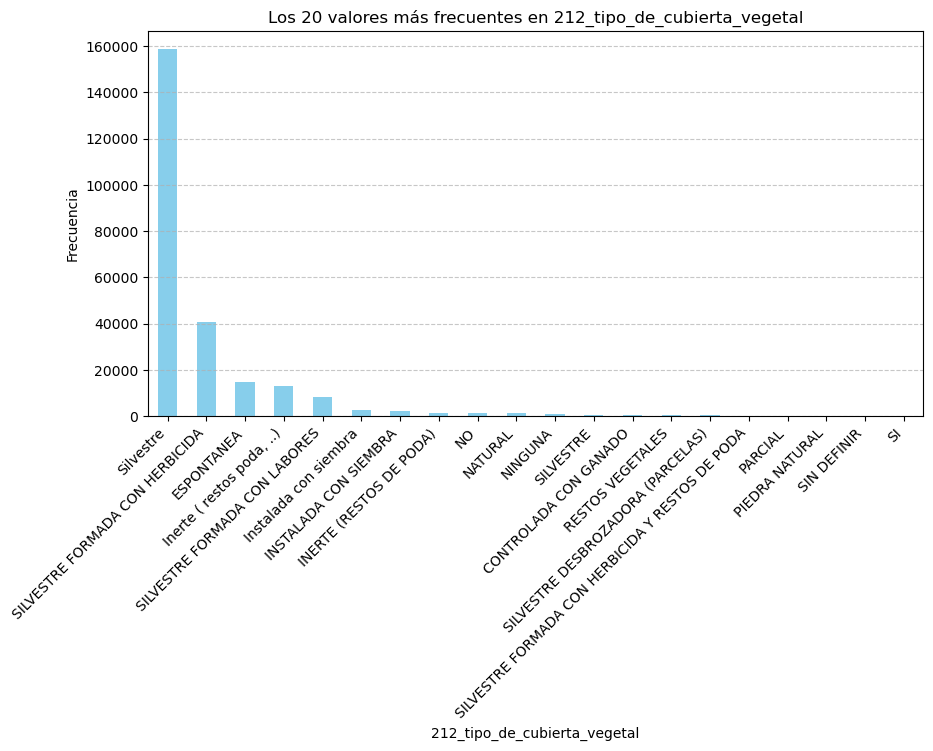

------------------------------------------------------------------------------------------------------------------------------
Columna: 214_cultivo_asociado/otro_aprovechamiento
Porcentaje de valores nulos: 89.28%
Valores únicos 13 

214_cultivo_asociado/otro_aprovechamiento
NO                                          53690
No                                           2765
NINGUNO                                      2683
Ninguno                                       365
CUBIERTA ESPONTANEA                           287
Almendro                                      278
CEREZO                                        196
CITRICOS EN ALGUNA DE LAS CALLES              178
SI                                            135
ALGUNOS FRUTALES COMO MANZANOS Y CEREZOS       70
CEREZOS EN PARTE DE LA PARCELA                 62
CEREAL                                         47
CITRICOS                                       39
OLIVAR                                          0
Name: count, dtype: int6

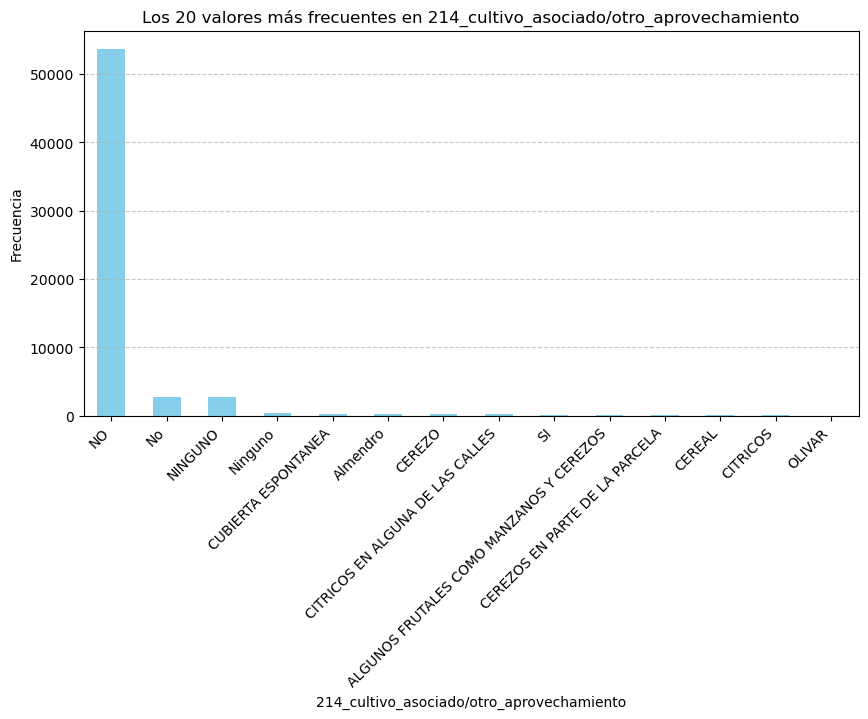

------------------------------------------------------------------------------------------------------------------------------
Columna: 301_marco_(m_x_m)
Porcentaje de valores nulos: 14.15%
Valores únicos 398 

301_marco_(m_x_m)
10 X 10              103696
8 X 8                 40299
9 X 9                 36232
7 X 7                 23023
12 X 12               21186
                      ...  
9'5 x 9'5                 0
14x14x14                  0
8x5                       0
5 X 1,5                   0
8 M A TRESBOLILLO         0
Name: count, Length: 407, dtype: int64


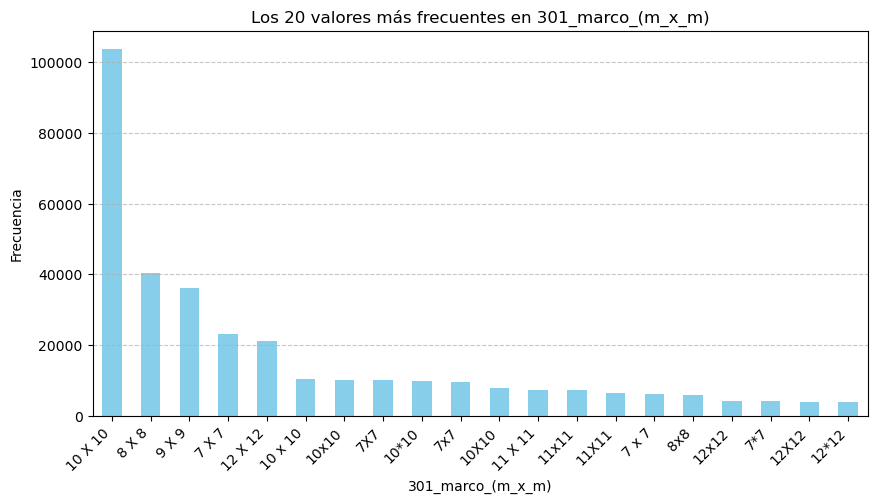

------------------------------------------------------------------------------------------------------------------------------
Columna: 304_formación
Porcentaje de valores nulos: 73.06%
Valores únicos 54 

304_formación
Vaso                             82148
VASO                             33434
MARCO REAL                        5580
REAL                              3578
TRADICIONAL                       2652
vaso                              2024
REJUVENECIMIENTO                  2017
Espaldera                         1771
TRESBOLILLO                       1608
VAS0                              1599
Natural                           1471
PODA DE RENOVACIÓN                1343
FORMACION                         1343
EN VASO LIBRE                     1162
NATURAL                           1016
MARCO TRESBOLILLO                  978
PRODUCCION Y REJUVENECIMIENTO      950
LIBRE                              760
3 PIES                             566
cuadro                             563


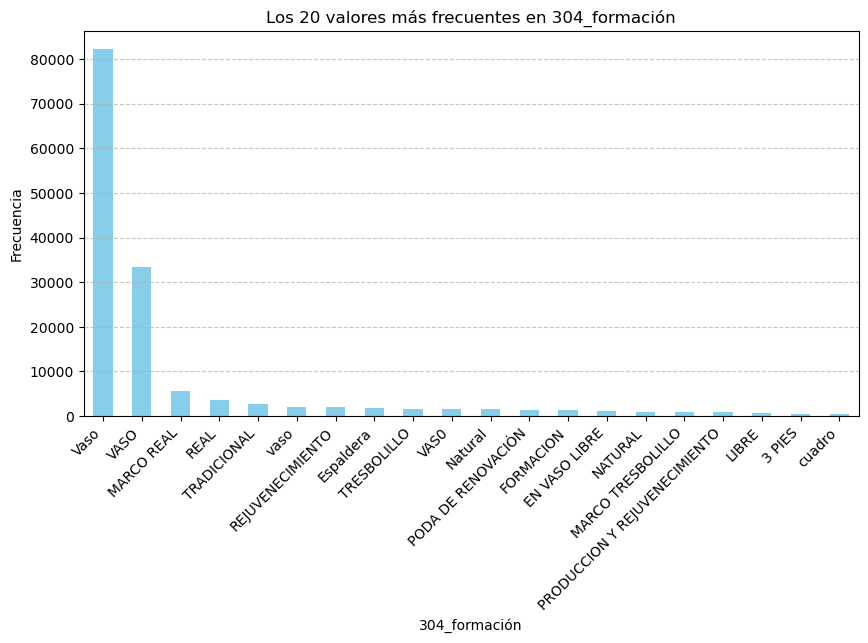

------------------------------------------------------------------------------------------------------------------------------
Columna: 308_variedad_principal
Porcentaje de valores nulos: 9.75%
Valores únicos 57 

308_variedad_principal
Picual, Marteño                                      179343
Hojiblanca, Lucentino                                 90813
PICUAL / MARTEÑO                                      89024
HOJIBLANCO                                            41457
PICUAL                                                30917
Manzanilla de Sevilla                                 11518
Arbequina                                              9932
Lechín de Sevilla, Zorzaleño, Ecijano                  6957
Picudo                                                 6261
MANZANILLO                                             5596
PICUDO                                                 5212
Nevadillo Negro                                        4747
LECHIN                                     

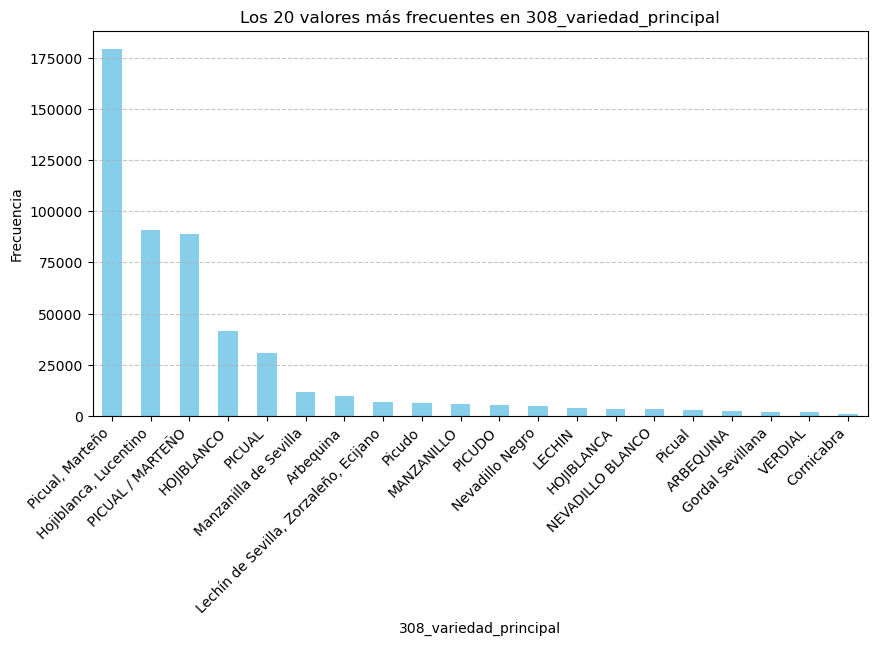

------------------------------------------------------------------------------------------------------------------------------
Columna: 311_fecha_de_plantación_variedad_principal
Porcentaje de valores nulos: 75.16%
Valores únicos 389 

311_fecha_de_plantación_variedad_principal
01/03/1950    7887
01/03/1990    6026
01/03/1960    5529
01/03/1900    5413
01/03/1995    5215
              ... 
01/11/1999       2
14/04/1996       2
20/05/1996       0
1986             0
01/11/2004       0
Name: count, Length: 392, dtype: int64


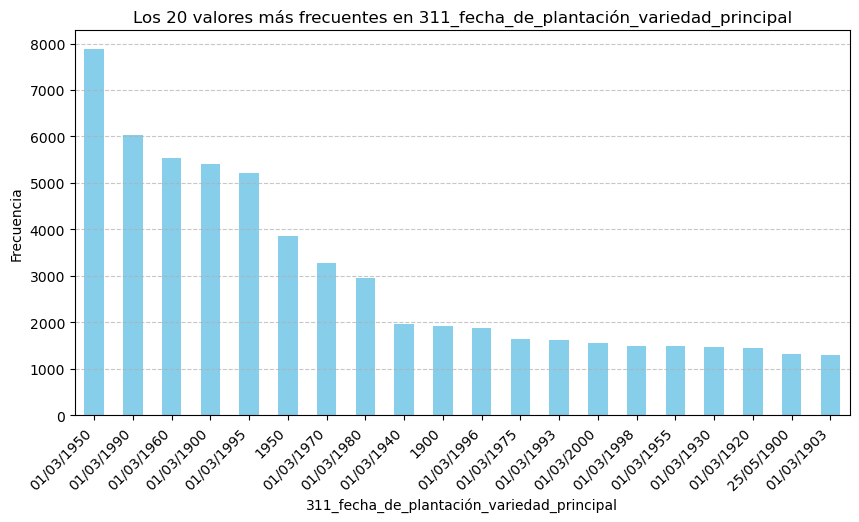

------------------------------------------------------------------------------------------------------------------------------
Columna: 208_riego:_procedencia_del_agua
Porcentaje de valores nulos: 76.20%
Valores únicos 62 

208_riego:_procedencia_del_agua
Pozo                              40047
POZO                              33977
Balsa                              9256
BALSA                              9216
RÍO                                8542
                                  ...  
GUADALBULLON                         11
Comunidad regantes                    3
BEMBEZAR                              2
COMUNIDAD REGANTES GENIL-CABRA        2
pozo-balsa                            2
Name: count, Length: 62, dtype: int64


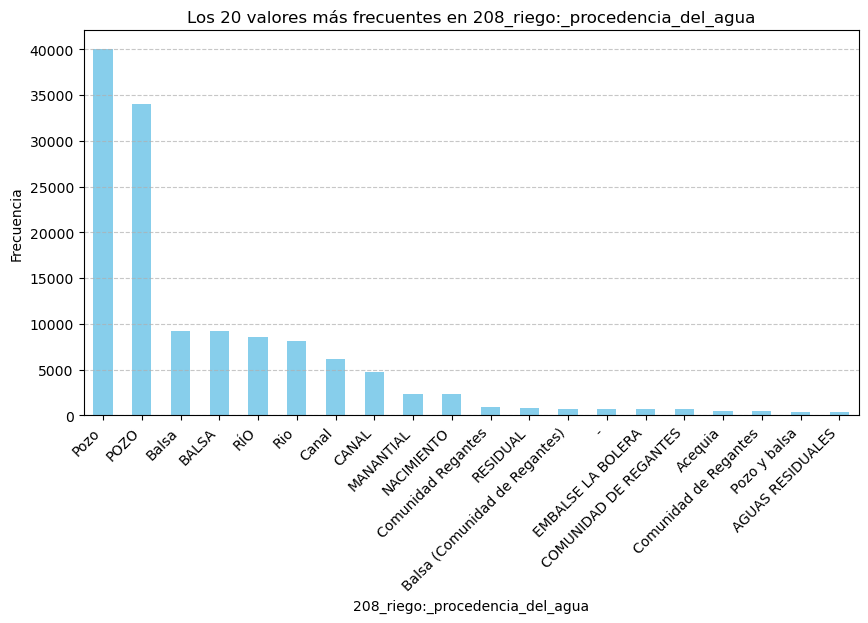

------------------------------------------------------------------------------------------------------------------------------
Columna: 209_riego:_calidad_del_agua
Porcentaje de valores nulos: 79.62%
Valores únicos 23 

209_riego:_calidad_del_agua
APTAS PARA EL RIEGO                                   50768
Aptas para riego                                      50705
APTAS PARA RIEGO                                       3207
UTILIZABLES CON PRECAUCIONES                           2676
APTA PARA RIEGO                                        1839
Aptas para riogo                                        890
BUENA                                                   856
Utilizable con precauciones                             822
No aptas para riego                                     763
-                                                       728
OPTIMA                                                  532
APTA                                                    449
MEDIANA CALIDAD                 

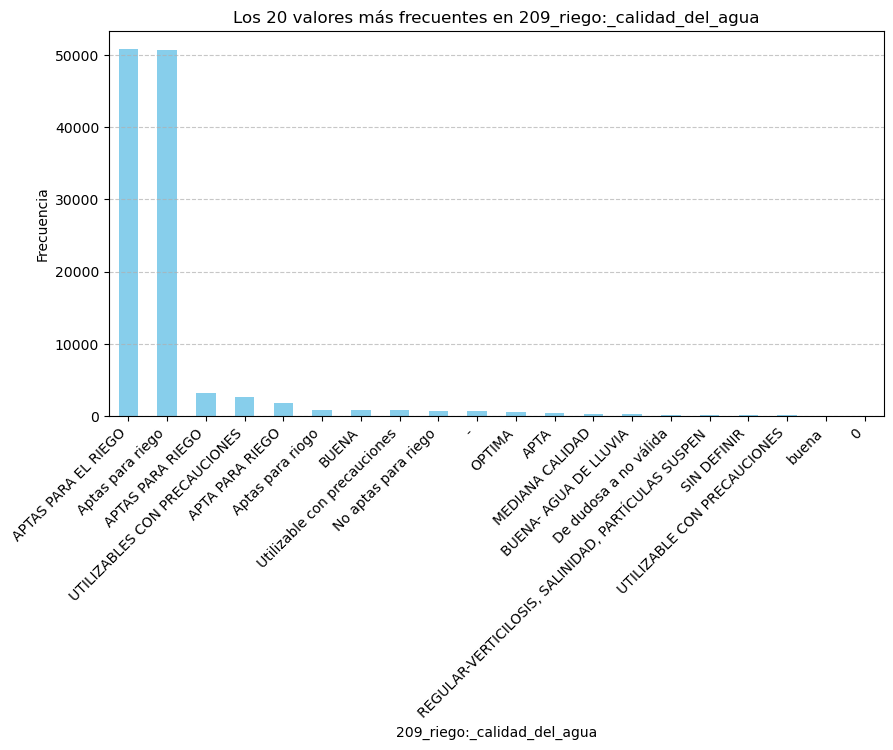

------------------------------------------------------------------------------------------------------------------------------
Columna: 313_variedad_secundaria
Porcentaje de valores nulos: 84.69%
Valores únicos 55 

313_variedad_secundaria
Picual, Marteño                          11790
Hojiblanca, Lucentino                     8730
HOJIBLANCO                                6794
PICUAL / MARTEÑO                          5795
PICUDO                                    5777
Picudo                                    5371
MANZANILLO                                5350
Manzanilla de Sevilla                     4560
Nevadillo Negro                           4212
Lechín de Sevilla, Zorzaleño, Ecijano     3739
PICUAL                                    3601
NEVADILLO BLANCO                          3145
Arbequina                                 2241
ARBEQUINA                                 2005
Gordal Sevillana                          1780
LECHIN                                    1767
Lucio   

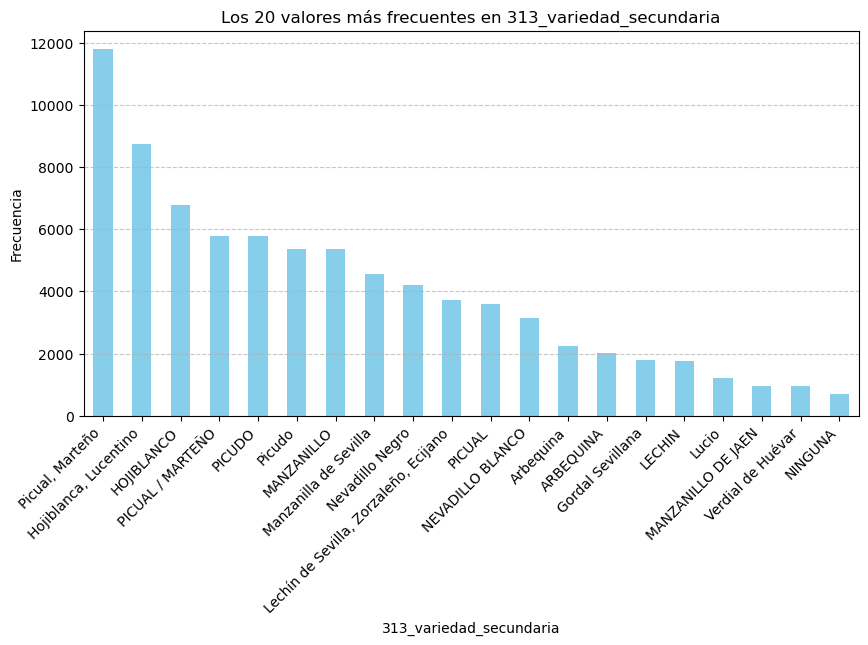

------------------------------------------------------------------------------------------------------------------------------
Columna: 107_zona_homogénea
Porcentaje de valores nulos: 38.31%
Valores únicos 931 

107_zona_homogénea
GR/OL/07                                 34052
GR/OL/01                                 33358
CO/OL/10                                 10815
JA012                                     9631
OLIVAR DE SIERRA                          9187
                                         ...  
EL PUNTAL                                    0
CORNEJALES                                   0
ZONA 4 PRIEGO                                0
9- EL DUQUE Y SUBBÈTICA SEPTENTRIONAL        0
18-AGUILAR Y MONTURQUE                       0
Name: count, Length: 940, dtype: int64


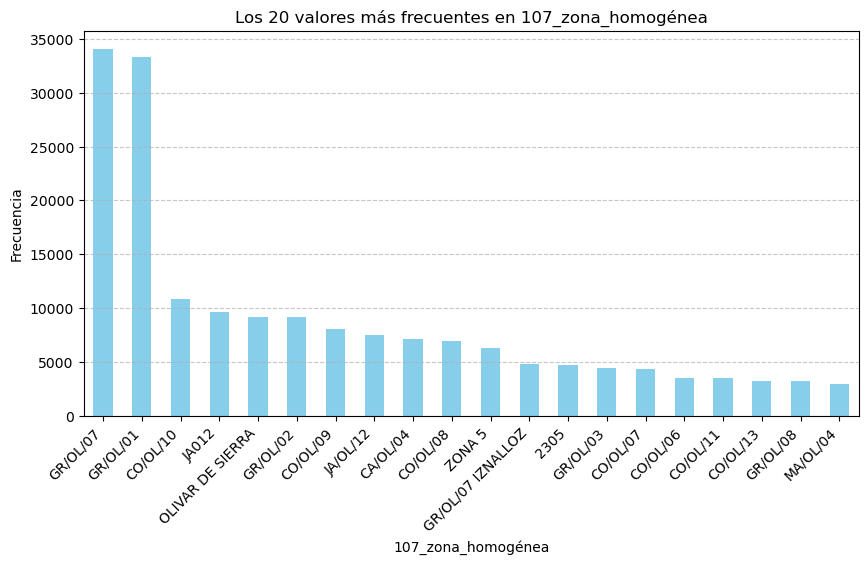

------------------------------------------------------------------------------------------------------------------------------
Columna: 120_zona_biológica_raif
Porcentaje de valores nulos: 1.40%
Valores únicos 74 

120_zona_biológica_raif
GR/OL/07 IZNALLOZ                   51401
JA/OL/12 LOMA BAJA                  46702
MA/OL/04 ANTEQUERA-NORTE            45933
GR/OL/01 MONTEFRIO                  42083
CO/OL/10 CAMPIÑA ALTA OCCIDENTAL    29090
                                    ...  
AL/OL/05 HUERCAL - OVERA              124
AL/OL/04 BAJO ALMANZORA                90
AL/OL/04 CAMPO DE TABERNAS             35
CA/OL/06 GRAZALEMA                     32
CA/OL/02 PRADO DEL REY                 32
Name: count, Length: 74, dtype: int64


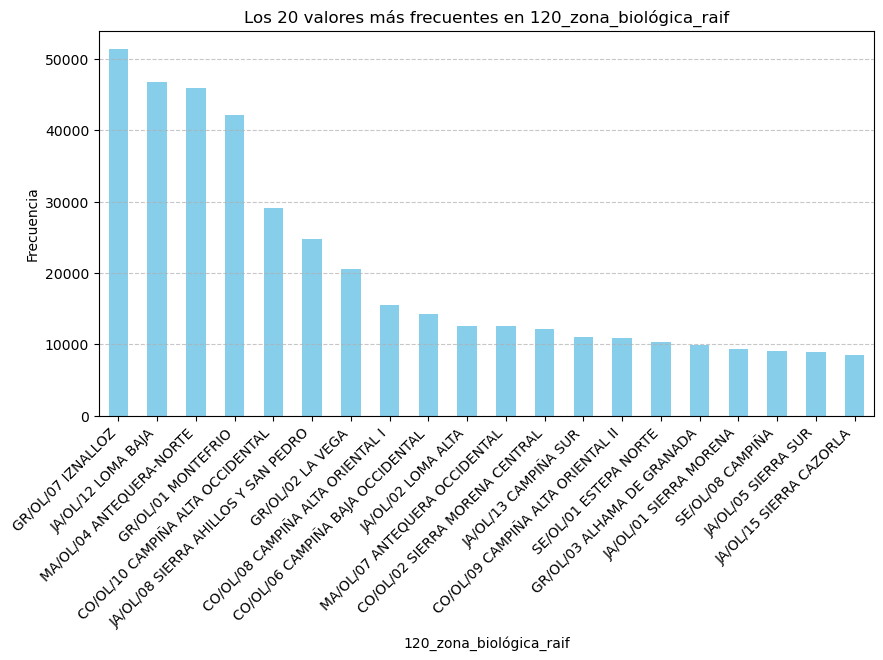

------------------------------------------------------------------------------------------------------------------------------
Columna: 401_estación_climática_asociada
Porcentaje de valores nulos: 29.23%
Valores únicos 219 

401_estación_climática_asociada
JA012                         36501
GR001                         32925
GR006                         30138
JA008                         25447
CO008                         13427
                              ...  
IFAPA Centro Mengibar             6
HUERCAL OVERA                     6
LOS PALACIOS Y VILLAFRANCA        5
BAEZA09                           4
QUESADA                           0
Name: count, Length: 220, dtype: int64


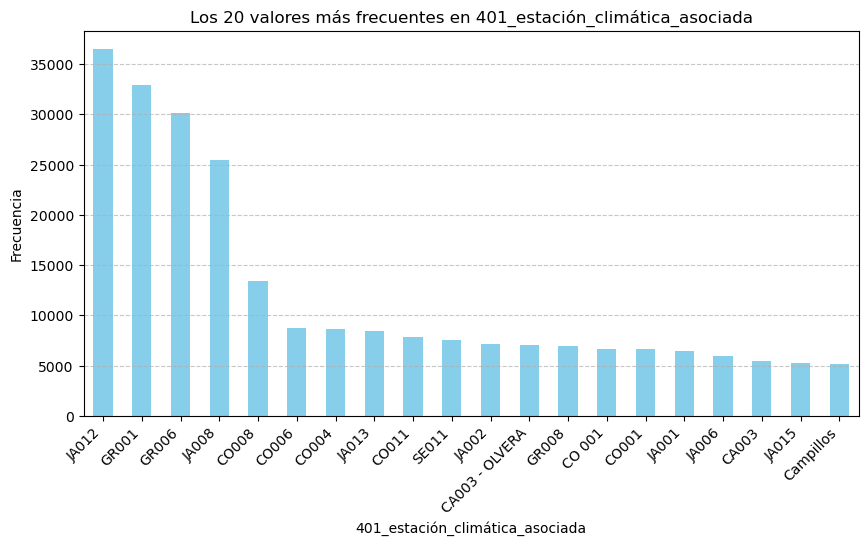

------------------------------------------------------------------------------------------------------------------------------
Columna: 402_sensor_climático_asociado
Porcentaje de valores nulos: 70.75%
Valores únicos 145 

402_sensor_climático_asociado
GR006                           12504
JA012                           12486
GR001                            7407
CA003 - OLVERA                   6996
SE011                            6379
                                ...  
LOS PALACIOS Y VILLAFRANCA          5
Basurta-Jerez de la Frontera        4
Lora del Rio                        4
Villamartín                         4
La Luisiana                         4
Name: count, Length: 145, dtype: int64


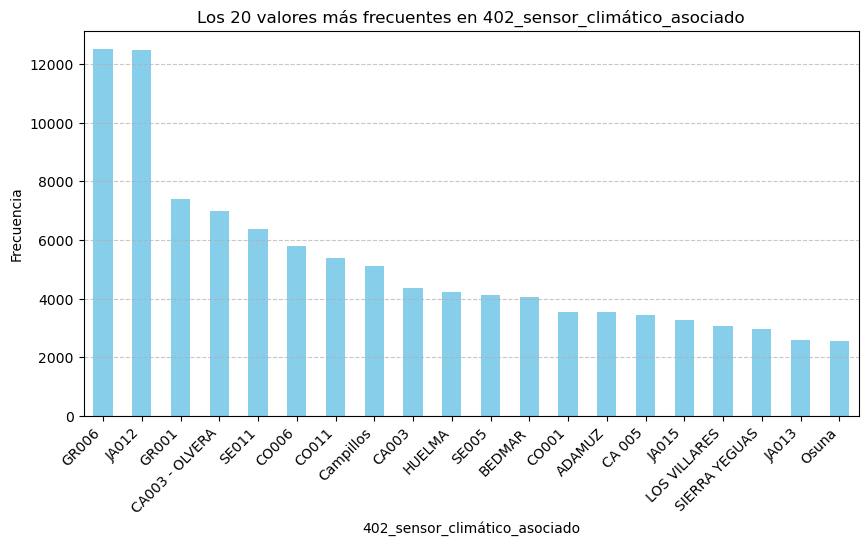

------------------------------------------------------------------------------------------------------------------------------
Columna: 207_riego:_sistema_usual_de_riego
Porcentaje de valores nulos: 68.54%
Valores únicos 52 

207_riego:_sistema_usual_de_riego
Localizado gotero                             88759
LOCALIZADO GOTERO                             55796
NINGUNO                                        5390
goteo                                          4511
LOCALIZADO MICROASPERSOR                       3450
GOTEO                                          2354
Gravedad manta                                 2183
LOCALIZADO LATIGUILLO                          2079
No existe sistema                              1365
GRAVEDAD MANTA                                 1301
Localizado microaspersor                        820
Gravedad pies                                   785
RIEGO POR GOTEO                                 752
Sin riego                                       728
GRAVEDAD SUR

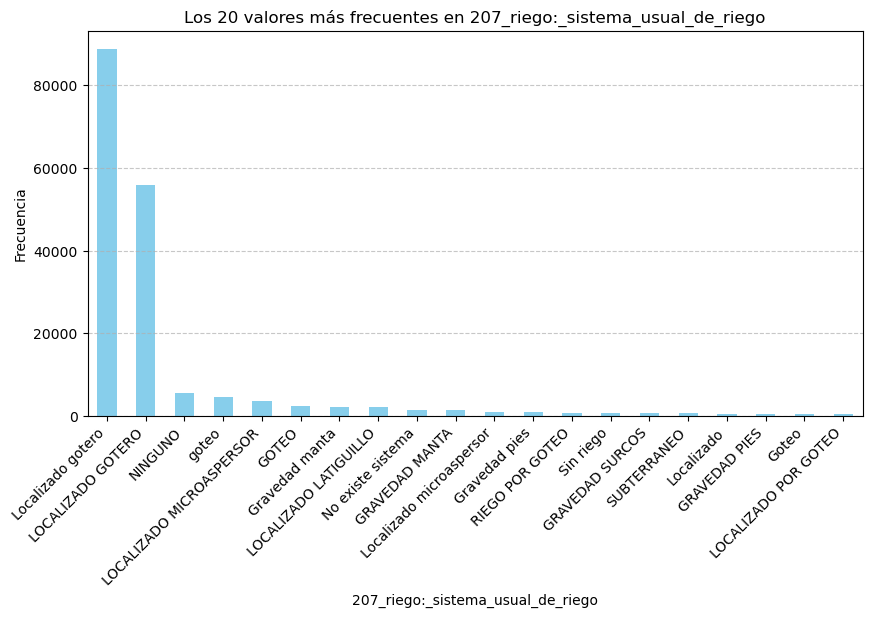

------------------------------------------------------------------------------------------------------------------------------
Columna: 108_u_h_c_a_la_que_pertenece
Porcentaje de valores nulos: 46.81%
Valores únicos 1764 

108_u_h_c_a_la_que_pertenece
GR01                      9508
D                         4286
3                         2693
1                         2566
E                         2292
                          ... 
IZNATORAF                    0
ALCALA                       0
UHC-6                        0
18-AGUILAR Y MONTURQUE       0
ZONA 4 PRIEGO                0
Name: count, Length: 1779, dtype: int64


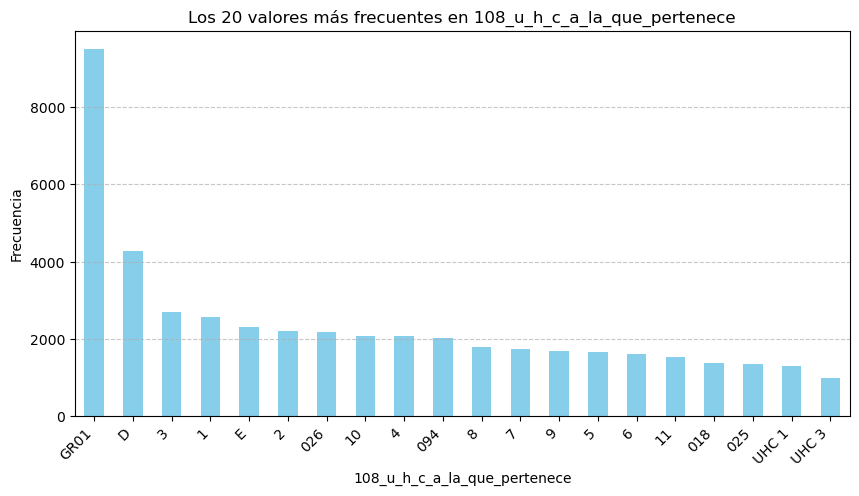

------------------------------------------------------------------------------------------------------------------------------
Columna: 316_fecha_de_plantación_variedad_secundaria
Porcentaje de valores nulos: 96.20%
Valores únicos 98 

316_fecha_de_plantación_variedad_secundaria
01/03/1990    1435
01/03/1995    1364
25/05/1900    1164
01/03/1960     901
01/03/1910     772
              ... 
01/09/2006      25
07/02/1945      16
01/09/2008       4
01/03/1970       3
01/03/2003       2
Name: count, Length: 98, dtype: int64


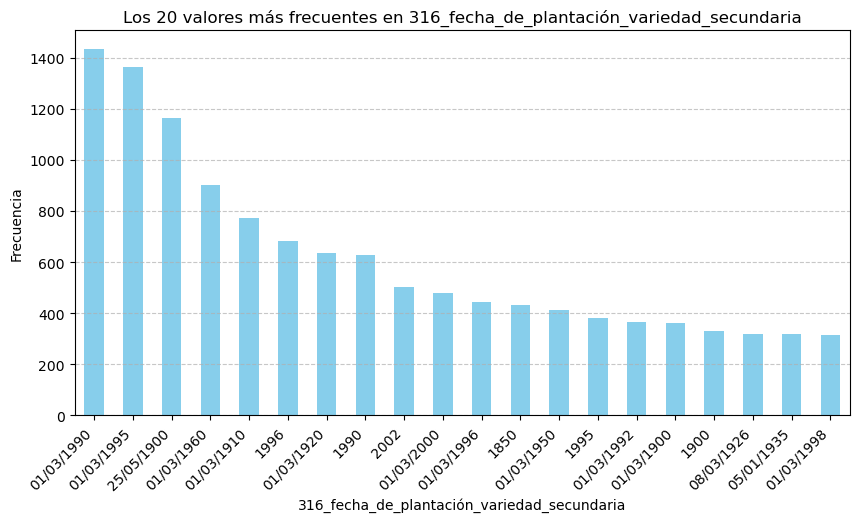

------------------------------------------------------------------------------------------------------------------------------
Columna: 315_patrón_variedad_secundaria
Porcentaje de valores nulos: 96.82%
Valores únicos 22 

315_patrón_variedad_secundaria
Ninguno               3383
NINGUNO               2868
Lechin de Sevilla     2339
Acebuche              2061
HOJIBLANCA            2052
Picual                1409
Manzanilla            1243
Hojiblanca             771
MANZANILLO DE JAEN     674
PICUAL                 374
SIN DEFINIR            145
LUCIO                  121
ACEBUCHE               119
Arbequina              103
NINGUNA                 92
Verdial de Huevar       85
NEVADILLO               72
-                       32
LECHÍN DE SEVILLA       25
MANZANILLO              23
LECHIN                  21
PICUAL O MARTEÑA         2
Name: count, dtype: int64


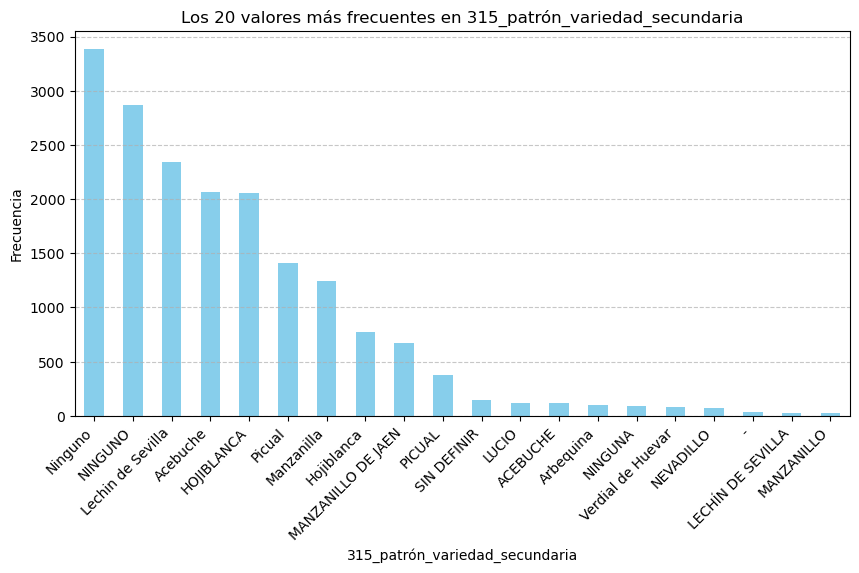

------------------------------------------------------------------------------------------------------------------------------
Columna: 310_patrón_variedad_principal
Porcentaje de valores nulos: 76.58%
Valores únicos 25 

310_patrón_variedad_principal
Picual                          48377
PICUAL                          36028
Hojiblanca                      13717
Ninguno                         11175
NINGUNO                          8627
Acebuche                         6484
Lechin de Sevilla                2701
Manzanilla                       1381
HOJIBLANCA                       1157
ACEBUCHE                         1072
NEVADILLO                         577
Arbequina                         475
Verdial de Huevar                 186
LECHIN                            157
SIN DEFINIR                       145
NO                                123
NINGUNA                            92
hojiblanco                         74
HOHIBLANCA                         73
ARBEQUINA                 

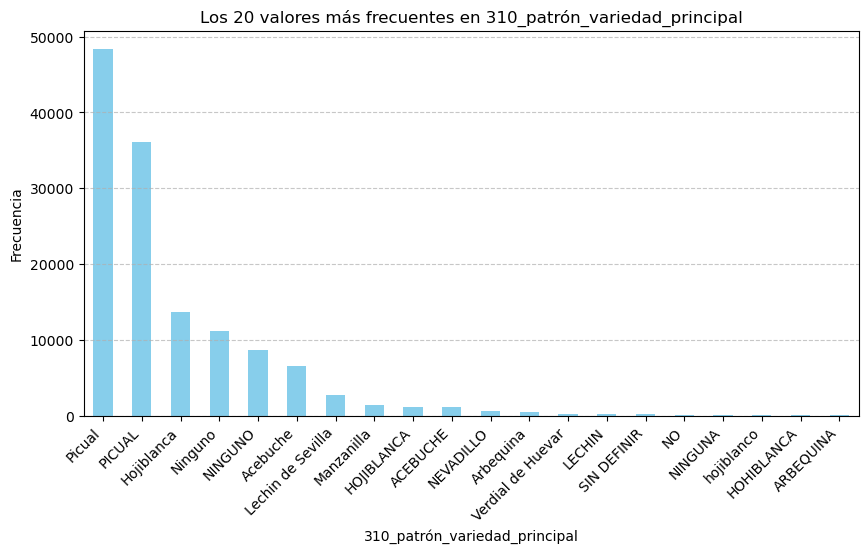

------------------------------------------------------------------------------------------------------------------------------
Columna: 411_representa_a_la_u_h_c_(si/no)
Porcentaje de valores nulos: 66.86%
Valores únicos 2 

411_representa_a_la_u_h_c_(si/no)
SI    187726
NO       145
Name: count, dtype: int64


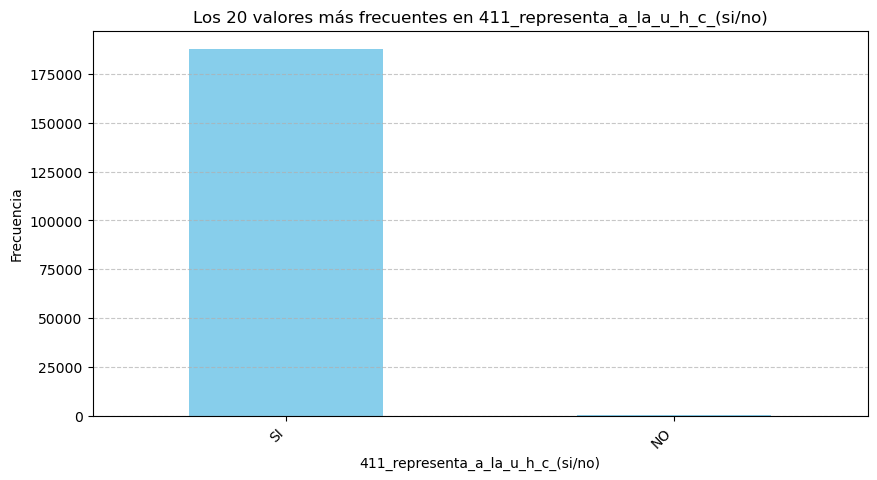

------------------------------------------------------------------------------------------------------------------------------
Columna: 109_sistema_para_el_cumplimiento_gestión_integrada
Porcentaje de valores nulos: 74.48%
Valores únicos 5 

109_sistema_para_el_cumplimiento_gestión_integrada
Producción Integrada (PI)        140438
Entidad de Asesoramiento (EA)      3524
Otro sistema Asesorado (OA)         570
Agricultura Ecológica (AE)           90
Producción certificada (PC)          60
Name: count, dtype: int64


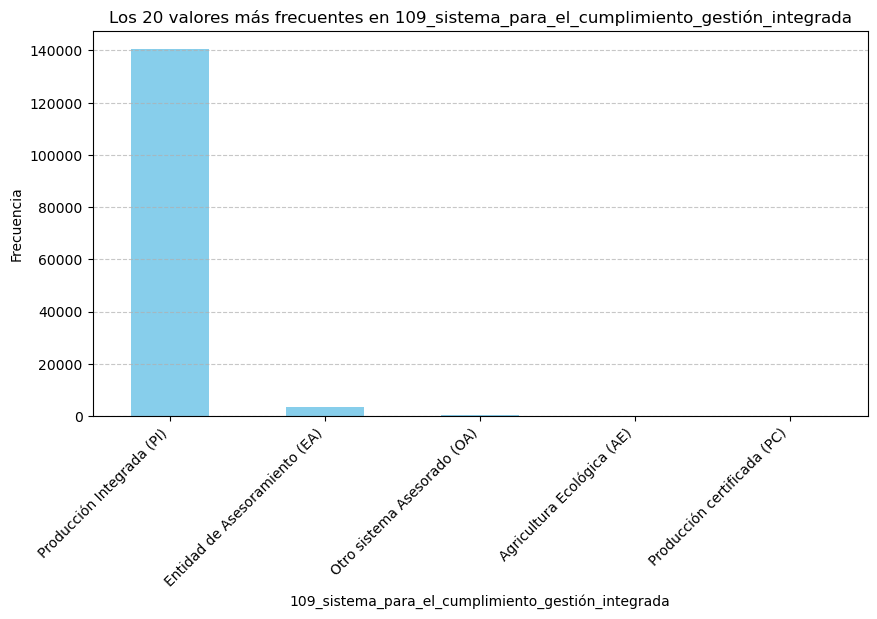

------------------------------------------------------------------------------------------------------------------------------
Columna: bucket
Porcentaje de valores nulos: 0.89%
Valores únicos 10 

bucket
30-35    232533
25-30    130412
35-40    115582
20-25     46086
15-20     20295
10-15      8954
5-10       4015
<5         2828
>45         754
40-45       410
Name: count, dtype: int64


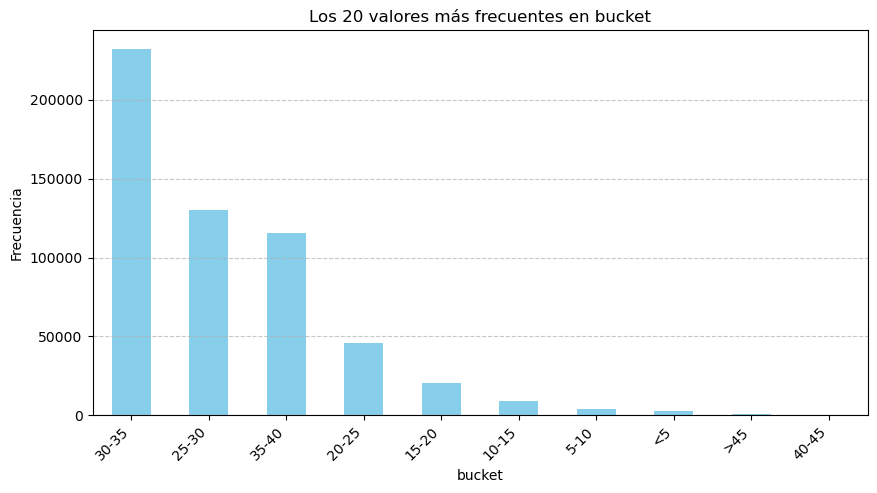

------------------------------------------------------------------------------------------------------------------------------
Columna: bucket_d
Porcentaje de valores nulos: 0.00%
Valores únicos 3 

bucket_d
<15      544970
15-30     18631
>30        3310
Name: count, dtype: int64


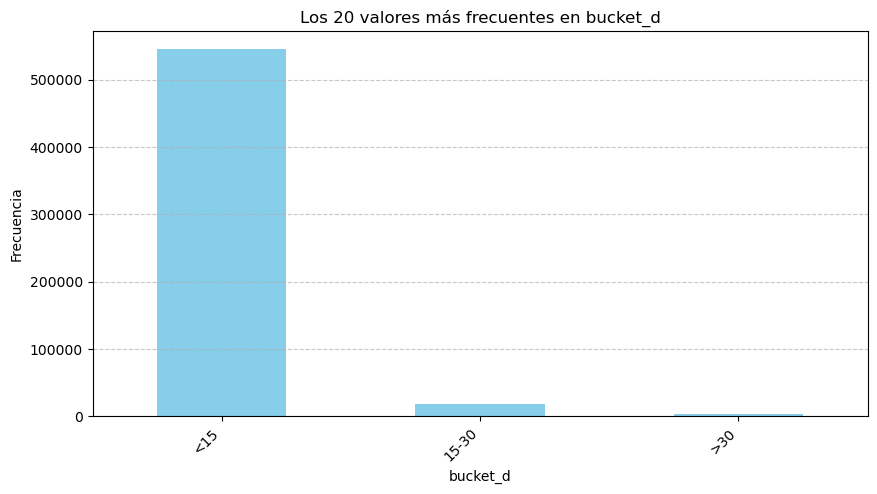

------------------------------------------------------------------------------------------------------------------------------


In [39]:
# Loop por todas las columnas del DataFrame para identificar las categóricas
for column in df.columns:
    if df[column].dtype in ['category','string']:  
        # Calcular el porcentaje de valores nulos
        null_perc = df[column].isnull().sum() / len(df) * 100
        
        # Imprimir la información de la columna
        print(f"Columna: {column}")
        print(f"Porcentaje de valores nulos: {null_perc:.2f}%")
        print("Valores únicos",df[column].nunique(),'\n')
        print(df[column].value_counts())
        
        # Obtener los 20 valores más frecuentes
        top_20_values = df[column].value_counts().head(20)
        
        # Crear un histograma de los valores más frecuentes
        plt.figure(figsize=(10, 5))
        top_20_values.plot(kind='bar', color='skyblue')
        plt.title(f'Los 20 valores más frecuentes en {column}')
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

        print('------------------------------------------------------------------------------------------------------------------------------')


## Estudio variables numéricas

Columna: campaña
Porcentaje de valores nulos: 0.00%
Estadísticas descriptivas:
count    566911.000000
mean       2012.834013
std           4.432814
min        2005.000000
25%        2009.000000
50%        2012.000000
75%        2017.000000
max        2021.000000
Name: campaña, dtype: float64


C:\Users\alex1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


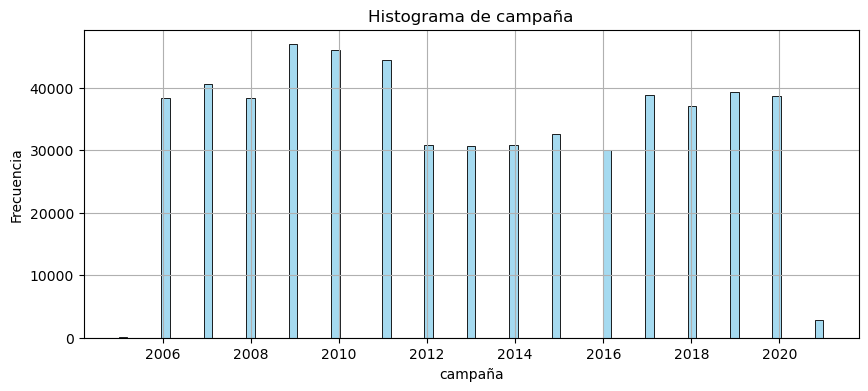

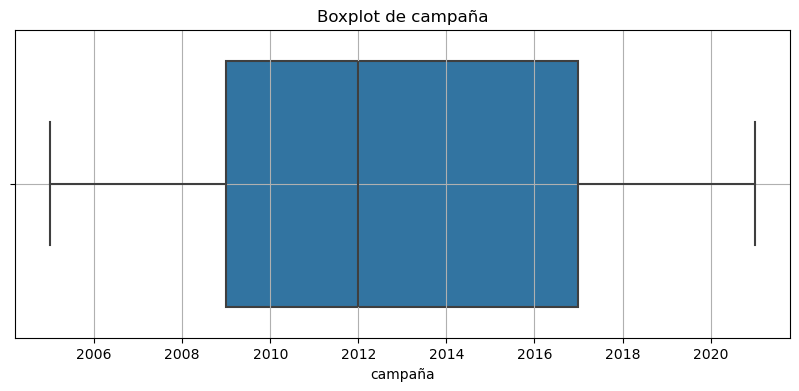

------------------------------------------------------------------------------------------------------------------------------
Columna: poligono
Porcentaje de valores nulos: 0.01%
Estadísticas descriptivas:
count     566859.0
mean     22.768128
std      29.709854
min            0.0
25%            7.0
50%           14.0
75%           29.0
max          504.0
Name: poligono, dtype: Float64


C:\Users\alex1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


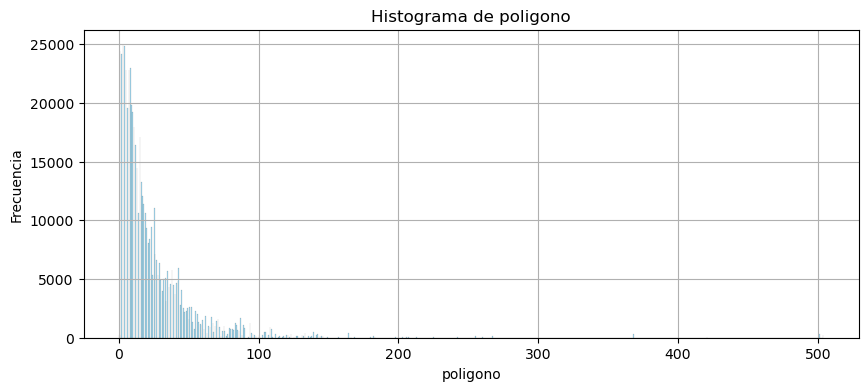

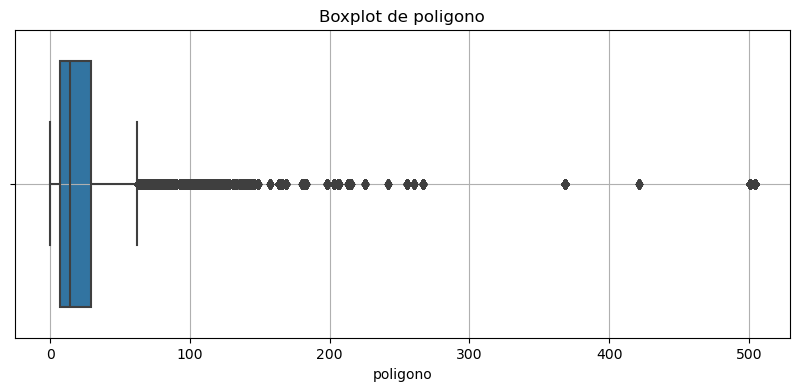

------------------------------------------------------------------------------------------------------------------------------
Columna: parcela
Porcentaje de valores nulos: 0.01%
Estadísticas descriptivas:
count      566881.0
mean     150.127155
std      624.282197
min             0.0
25%            21.0
50%            67.0
75%           167.0
max         18103.0
Name: parcela, dtype: Float64


C:\Users\alex1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


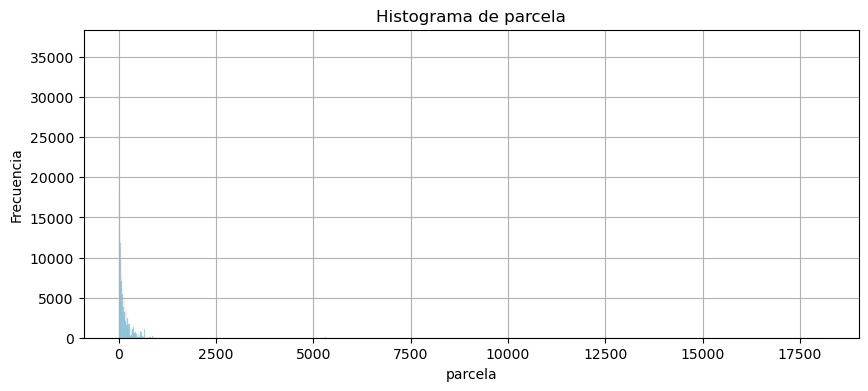

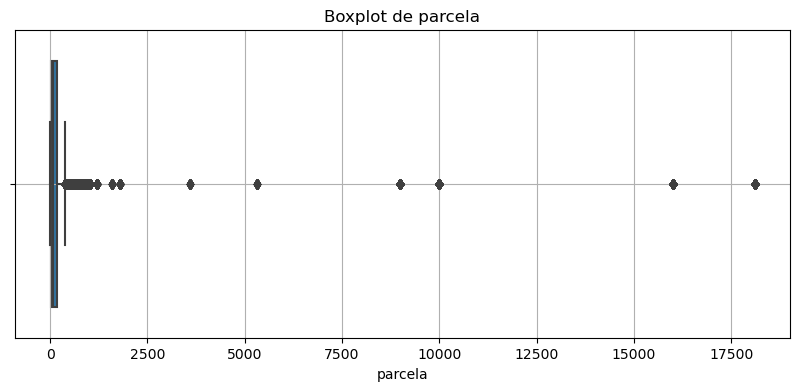

------------------------------------------------------------------------------------------------------------------------------
Columna: recinto
Porcentaje de valores nulos: 0.30%
Estadísticas descriptivas:
count    565201.0
mean     1.480355
std      3.598952
min           0.0
25%           0.0
50%           1.0
75%           1.0
max          90.0
Name: recinto, dtype: Float64


C:\Users\alex1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


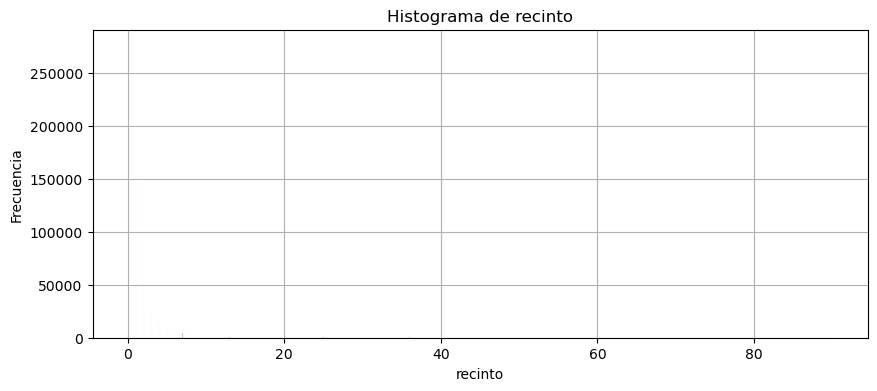

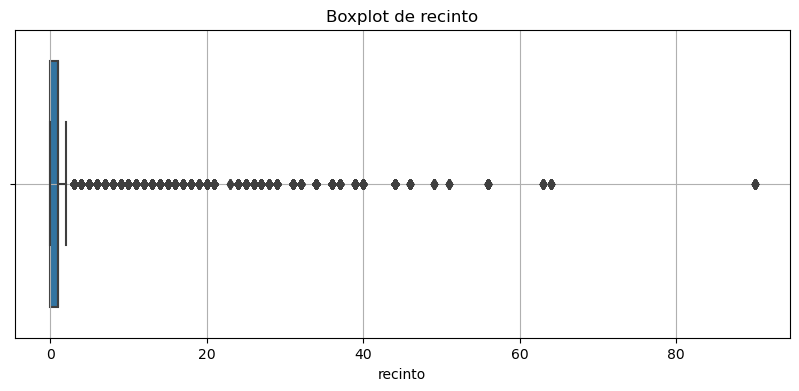

------------------------------------------------------------------------------------------------------------------------------
Columna: subrecinto
Porcentaje de valores nulos: 17.93%
Estadísticas descriptivas:
count    465270.0
mean     1.448767
std      6.927543
min          -1.0
25%           0.0
50%           0.0
75%           1.0
max          99.0
Name: subrecinto, dtype: Float64


C:\Users\alex1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


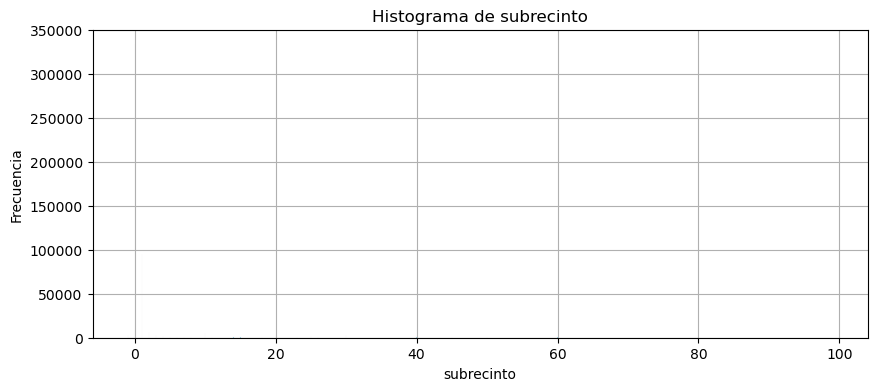

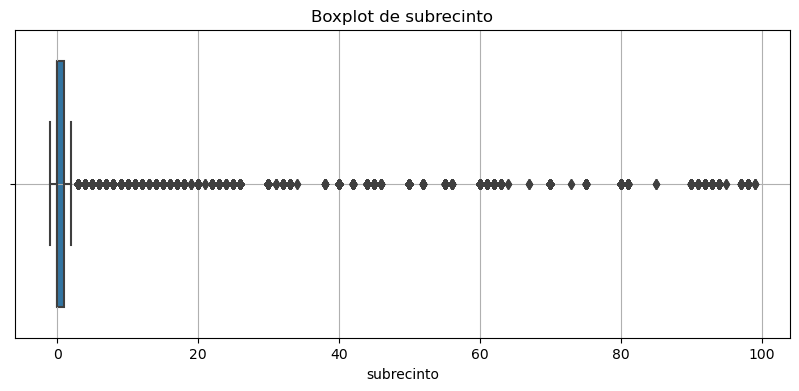

------------------------------------------------------------------------------------------------------------------------------
Columna: porcentaje_floracion
Porcentaje de valores nulos: 94.96%
Estadísticas descriptivas:
count    28556.000000
mean        49.969646
std         37.800266
min          0.000000
25%         10.000000
50%         50.000000
75%         90.000000
max        100.000000
Name: porcentaje_floracion, dtype: float64


C:\Users\alex1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


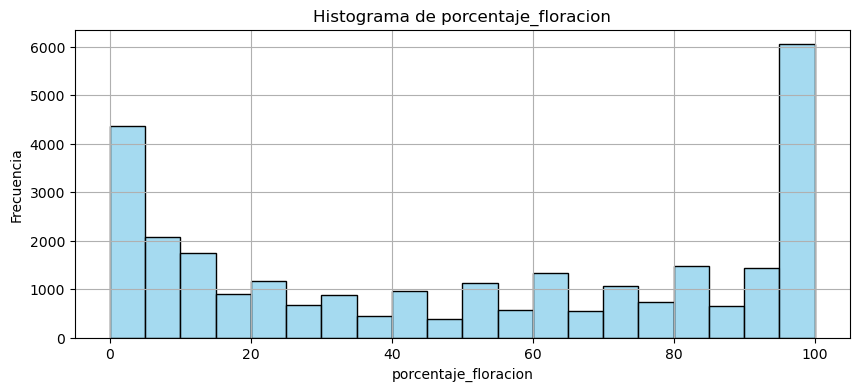

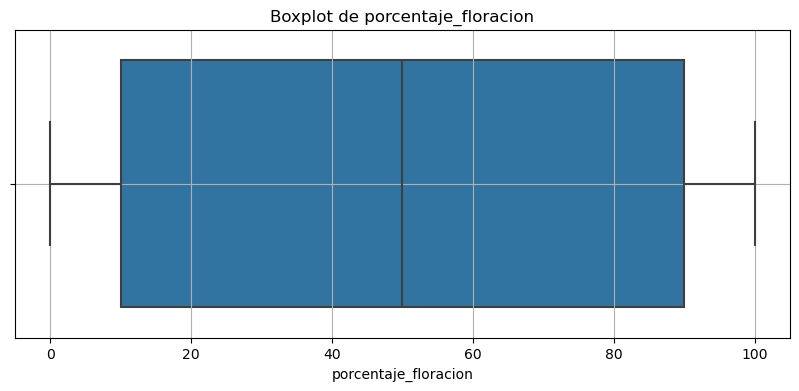

------------------------------------------------------------------------------------------------------------------------------
Columna: 104_altitud_(m)
Porcentaje de valores nulos: 32.94%
Estadísticas descriptivas:
count    380198.000000
mean        587.243347
std         258.141602
min           0.000000
25%         400.000000
50%         560.000000
75%         755.000000
max        3560.000000
Name: 104_altitud_(m), dtype: float64


C:\Users\alex1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


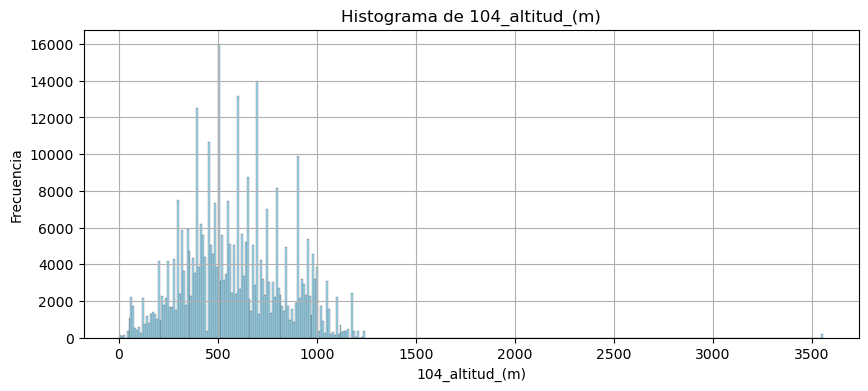

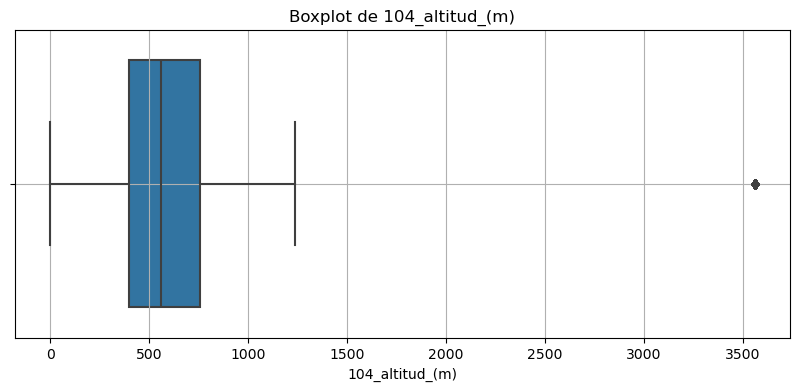

------------------------------------------------------------------------------------------------------------------------------
Columna: 201_superf_cultivada_en_la_parcela_agrícola_(ha)
Porcentaje de valores nulos: 8.66%
Estadísticas descriptivas:
count    517817.000000
mean         54.165028
std         306.177246
min           0.000000
25%           2.002000
50%           6.140000
75%          21.629999
max       35781.000000
Name: 201_superf_cultivada_en_la_parcela_agrícola_(ha), dtype: float64


C:\Users\alex1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


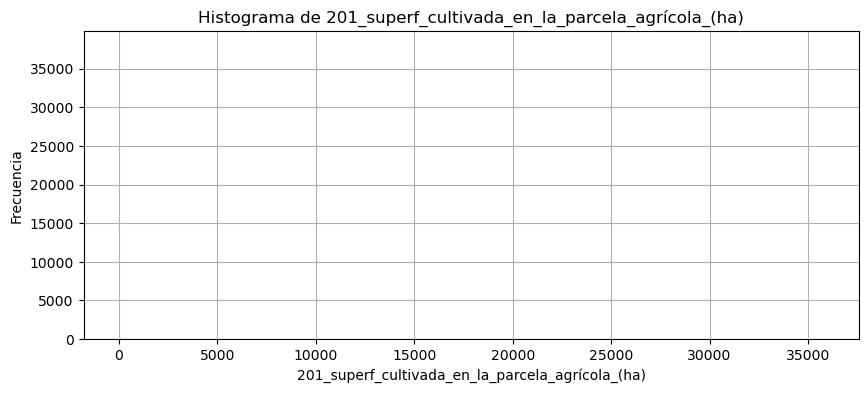

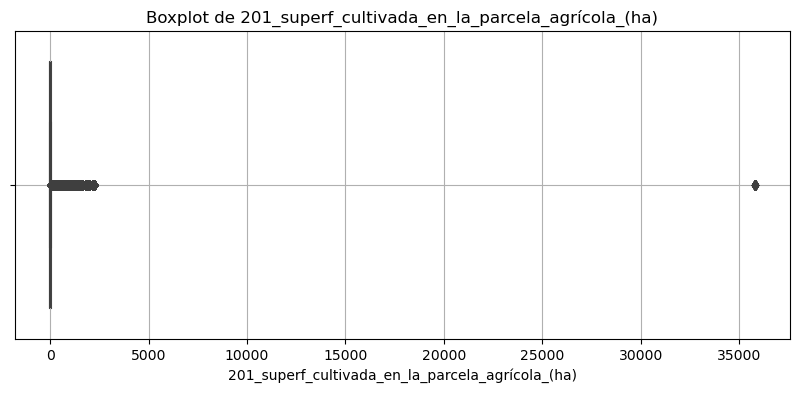

------------------------------------------------------------------------------------------------------------------------------
Columna: 202_pendiente_(%)
Porcentaje de valores nulos: 34.59%
Estadísticas descriptivas:
count    370814.000000
mean         10.197309
std           8.599125
min           0.000000
25%           4.000000
50%           8.000000
75%          15.000000
max          64.000000
Name: 202_pendiente_(%), dtype: float64


C:\Users\alex1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


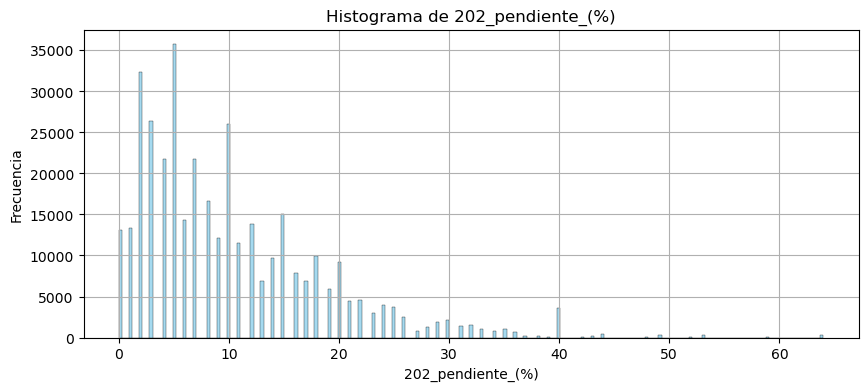

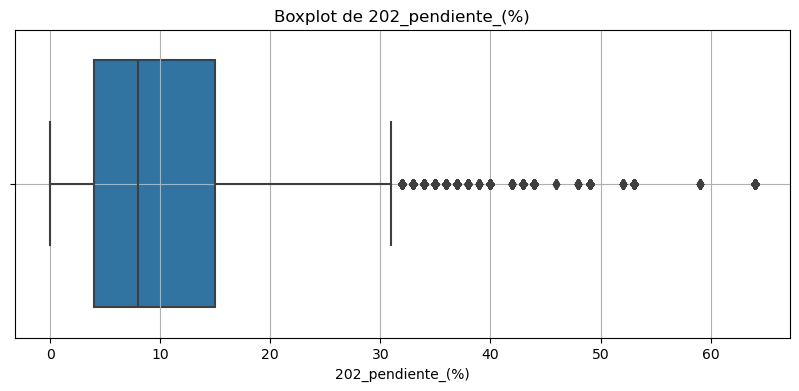

------------------------------------------------------------------------------------------------------------------------------
Columna: 302_densidad_(plantas/ha)
Porcentaje de valores nulos: 13.77%
Estadísticas descriptivas:
count    488855.000000
mean        144.642563
std         172.571869
min           0.000000
25%         100.000000
50%         110.000000
75%         157.000000
max       11879.000000
Name: 302_densidad_(plantas/ha), dtype: float64


C:\Users\alex1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


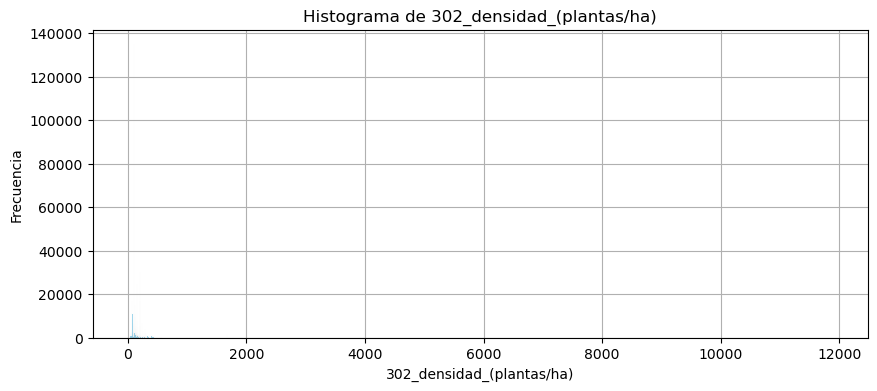

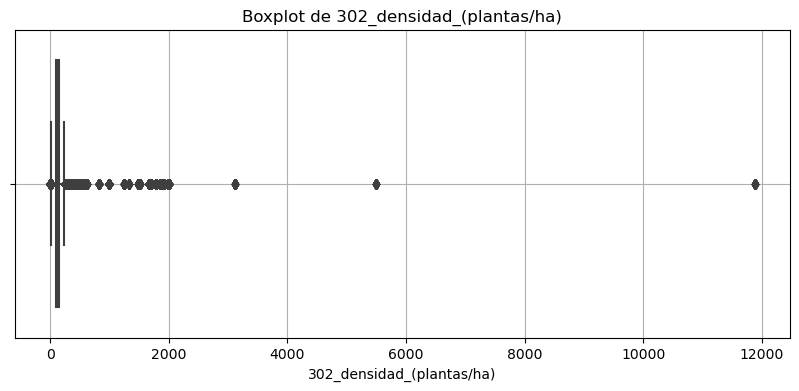

------------------------------------------------------------------------------------------------------------------------------
Columna: 303_nº_pies_por_árbol
Porcentaje de valores nulos: 23.73%
Estadísticas descriptivas:
count    432356.000000
mean          2.345717
std           4.817722
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max         193.000000
Name: 303_nº_pies_por_árbol, dtype: float64


C:\Users\alex1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


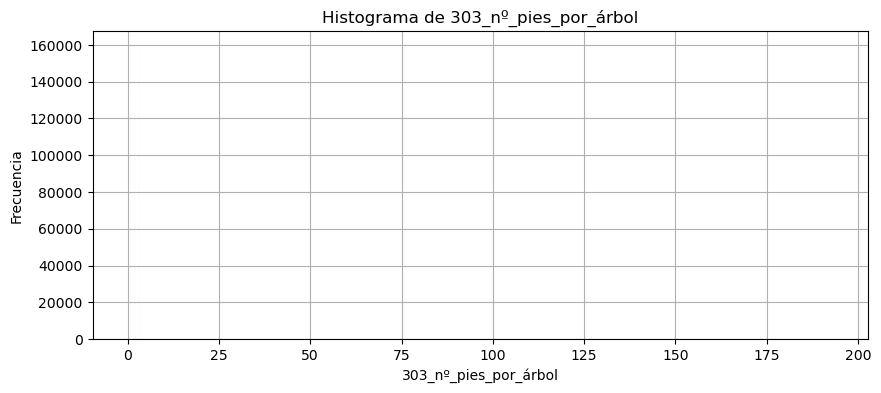

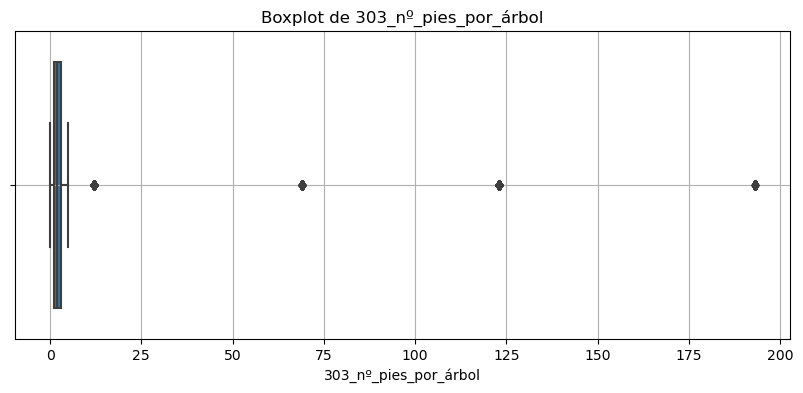

------------------------------------------------------------------------------------------------------------------------------
Columna: 305_diámetro_de_copa_(m)
Porcentaje de valores nulos: 78.90%
Estadísticas descriptivas:
count    119611.00000
mean         47.30217
std         647.30365
min           0.00000
25%           4.00000
50%           4.00000
75%           5.50000
max       10000.00000
Name: 305_diámetro_de_copa_(m), dtype: float64


C:\Users\alex1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


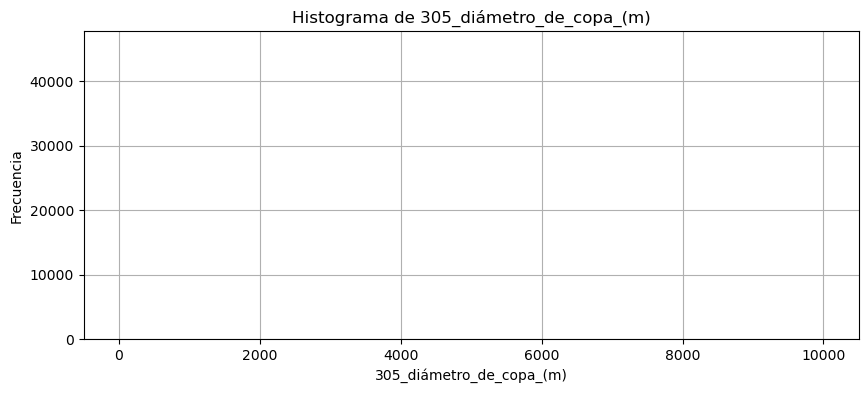

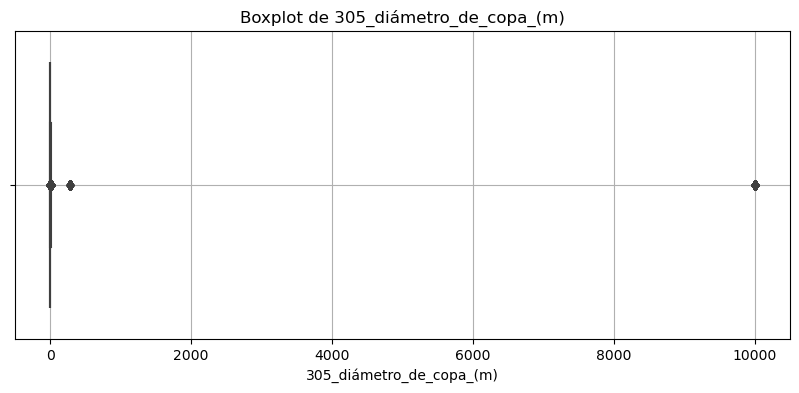

------------------------------------------------------------------------------------------------------------------------------
Columna: 317_%_superficie_ocupada_variedad_secundaria
Porcentaje de valores nulos: 96.03%
Estadísticas descriptivas:
count    22511.000000
mean        23.256720
std         15.808163
min          0.000000
25%         10.000000
50%         25.000000
75%         34.000000
max         60.000000
Name: 317_%_superficie_ocupada_variedad_secundaria, dtype: float64


C:\Users\alex1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


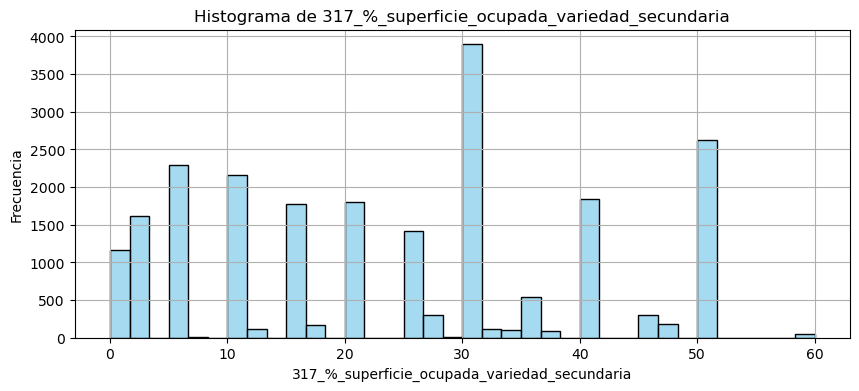

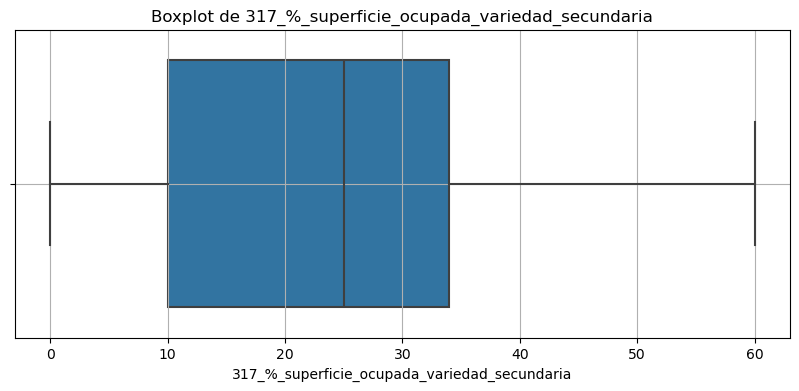

------------------------------------------------------------------------------------------------------------------------------
Columna: 306_altura_de_copa_(m)
Porcentaje de valores nulos: 87.46%
Estadísticas descriptivas:
count    7.107100e+04
mean     1.147431e+05
std      1.430554e+06
min      0.000000e+00
25%      3.000000e+00
50%      3.000000e+00
75%      3.500000e+00
max      1.803572e+07
Name: 306_altura_de_copa_(m), dtype: float64


C:\Users\alex1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


MemoryError: Unable to allocate 5.57 GiB for an array with shape (747075320,) and data type int64

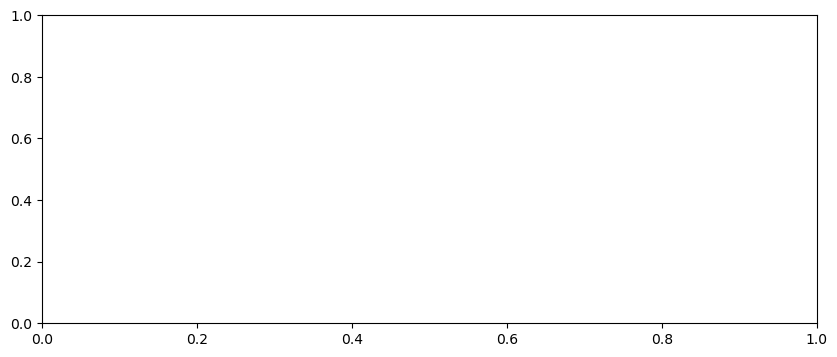

In [40]:
cols_numericas = []
for column in df.columns:
    if df[column].dtype not in ['datetime64[us]',' datetime64[ns]', 'category','string', 'object'] and column not in columnas + ['102_coordenada_x_(utm)','103_coordenada_y_(utm)','306_altura_de_copa_(m)']:  
        cols_numericas.append(column)
        
        # Calcular el porcentaje de valores nulos
        null_perc = df[column].isnull().sum() / len(df) * 100
        # Calcular estadísticas descriptivas
        stats = df[column].describe()
        
        # Imprimir la información de la columna
        print(f"Columna: {column}")
        print(f"Porcentaje de valores nulos: {null_perc:.2f}%")
        print("Estadísticas descriptivas:")
        print(stats)
        
        # Crear un histograma de la variable
        plt.figure(figsize=(10, 4))
        sns.histplot(df[column].dropna(), kde=False, color='skyblue')
        plt.title(f'Histograma de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()
        
        # Crear un boxplot de la variable
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df[column].dropna())
        plt.title(f'Boxplot de {column}')
        plt.xlabel(column)
        plt.grid(True)
        plt.show()

        print('------------------------------------------------------------------------------------------------------------------------------')


In [41]:
cols_numericas 

['campaña',
 'poligono',
 'parcela',
 'recinto',
 'subrecinto',
 'porcentaje_floracion',
 '104_altitud_(m)',
 '201_superf_cultivada_en_la_parcela_agrícola_(ha)',
 '202_pendiente_(%)',
 '302_densidad_(plantas/ha)',
 '303_nº_pies_por_árbol',
 '305_diámetro_de_copa_(m)',
 '317_%_superficie_ocupada_variedad_secundaria',
 '306_altura_de_copa_(m)']

<Axes: >

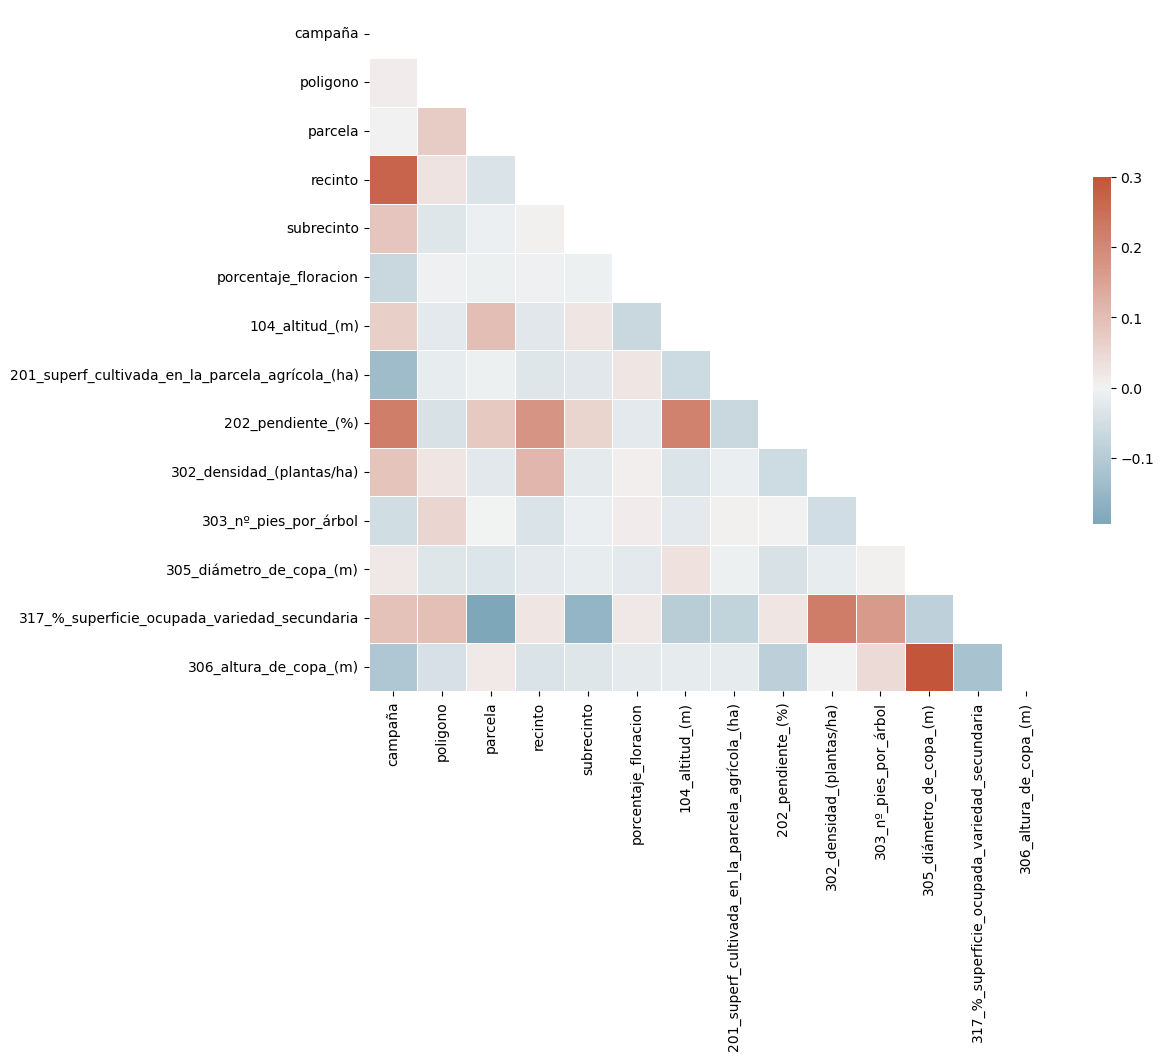

In [45]:
# Compute the correlation matrix
corr = df[cols_numericas].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

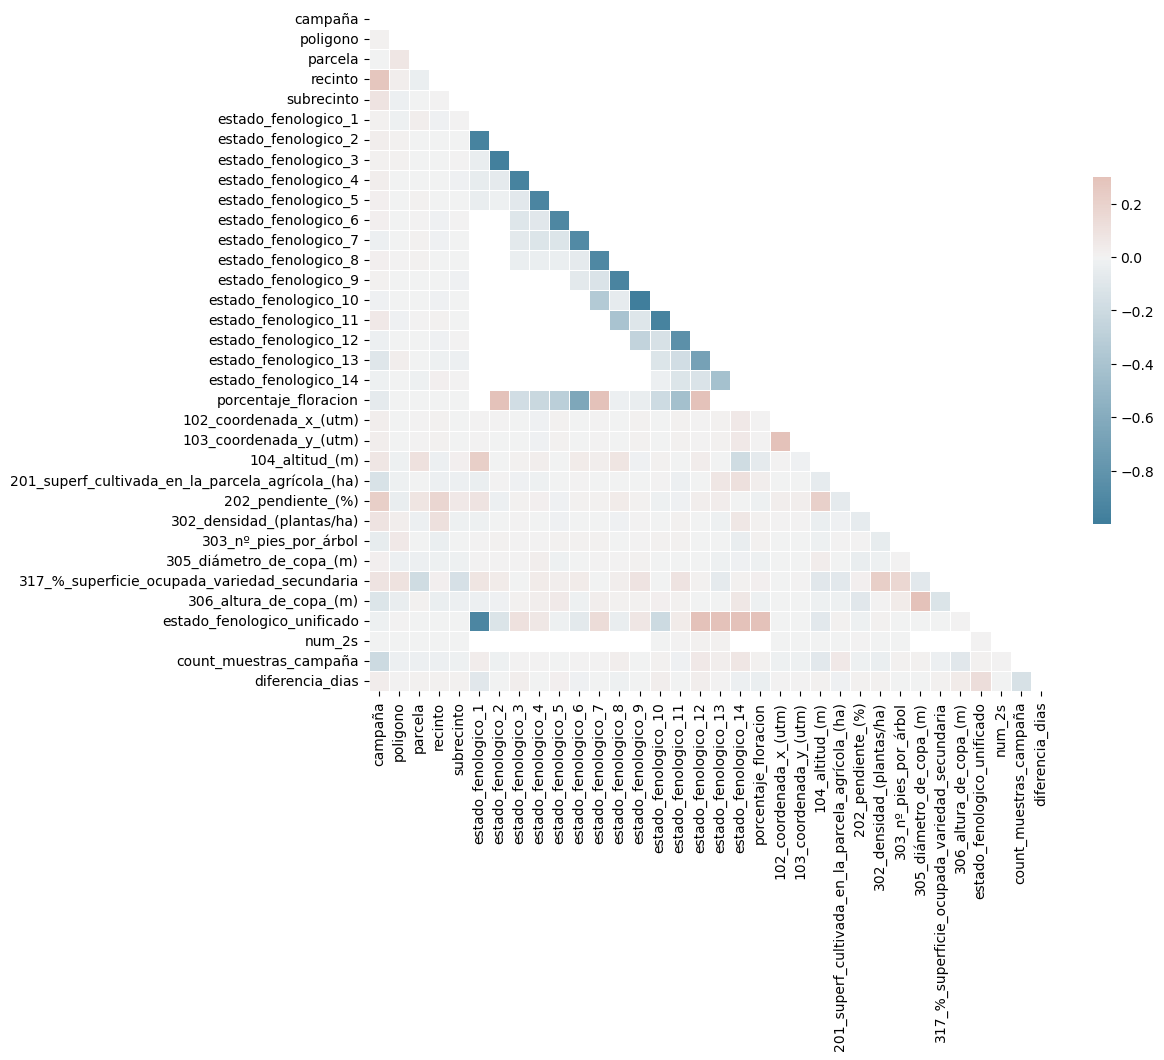

In [46]:
# Compute the correlation matrix
corr = df.select_dtypes(include=np.number).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Target variable 

In [ ]:
def generate_target_est_fen(parcelas_df:pd.DataFrame, window_size:int=14, window_tolerance:int=2)-> pd.DataFrame:
    df = parcelas_df[['codparcela', 'fecha', 'estado_fenologico_unificado']].copy()
    df['fecha'] = df['fecha'].astype('datetime64[ns]') # Aseguramos ns para que no cambie la precisión del datetime con las operaciones

    # Generamos la fecha en el pasado de la que queremos tener el estado fenológico
    parcelas_df['fecha_futuro'] = parcelas_df['fecha'] + pd.Timedelta(days=window_size)

    # Join con tolerancia de fechas
    parcelas_with_target_df = pd.merge_asof(
                parcelas_df.sort_values('fecha'), df.sort_values('fecha'), 
                by='codparcela', left_on='fecha_futuro', right_on='fecha', 
                       suffixes=('', '_future'), direction='nearest', tolerance=pd.Timedelta(days=window_tolerance))

    # Creamos target= est. fen. futuro - est. fen. actual y una columna con la diferencia de días
    parcelas_with_target_df['target'] = parcelas_with_target_df['estado_fenologico_unificado_future'] - parcelas_with_target_df['estado_fenologico_unificado']

    parcelas_with_target_df['target_days_diff'] = parcelas_with_target_df['fecha_future'] - parcelas_with_target_df['fecha']
    
    return parcelas_with_target_df

In [ ]:
columns = ['codparcela', 'fecha','campaña', 'estado_fenologico_unificado','fecha_futuro','fecha_future','estado_fenologico_unificado_future', 'target','target_days_diff']
test = generate_target_est_fen(df0)[columns].sort_values(by=['codparcela','fecha'])

In [ ]:
test

In [ ]:
test.head(50)

In [ ]:
test.tail(50)

## Baseline

In [ ]:
base = df.groupby(['codparcela', 'estado_fenologico_unificado', 'campaña'], observed=True)['fecha'].agg(['min', 'max']).reset_index().rename(columns={"min": "fecha_min_estado", "max": "fecha_max_estado"})
base = base.sort_values(by=['codparcela', 'fecha_min_estado', 'estado_fenologico_unificado'])

# Sacamos al fecha min en el siguiente estado para aproximar el tiempo que pasa en dicho estado
base['fecha_min_siguiente_estado'] = base.groupby(['codparcela', 'campaña'])['fecha_min_estado'].shift(-1)

base['days_estado'] = base['fecha_min_siguiente_estado'] - base['fecha_min_estado']
base

In [ ]:
base[base['campaña'] == 2011].head(50)

In [ ]:
df0[(df0['codparcela'] == 'RAIF-5') & (df0['campaña'] == 2020)]

# Conclusiones

**Exploración estados fenológicos**
* Existen filas sin ningún estado fenológico informado. También hay filas que traen el estado mal informado con valores como 3,5,11, 0.5. Por último, hay 5 filas en las que existe más de un estado fenológico mayoritario.
* El est fen 14 es el que presenta más nulos de todos. Hipótesis: Lo más probable es que en ese punto del desarrollo de los olivos ya se deje de lado el muestreo de cara a recoger la oliva.
* Los estados 9,10 y 11 son los que aparecen con mayor frecuencia.
* Haciendo una distribución de los est fen por año de campaña podemos comprobar la escasez de muestras para los años 2005,2021 y 2022. También se ve claramente que la cosecha va aproximadamente de Febrero a Noviembre.


**Estudio muestreo parcelas**
* Viendo los datos del número de muestreos por parcela y campaña, había codparcelas con más de 100 muestras. Siendo la frecuencia de muestreo aproximada de una semana, ese valor era muy superior a las 52 semanas de una año. Investigando a la localización de las parcelas se puede comprobar que están en distinttas provincias no colindantes. Codparcela no es primary key.
* Hay parcelas que aparecen una única vez en una campaña. Lo que no aporta ningún poder predictivo para generar un target y se puedene eliminar. También hay parcelas con pocas muestras y muy espaciadas en ciertas campañas, las cuales tampoco son útiles de cara a generar un target.
* Por cada campañan en torno a un 10% de las muestras se realizan con >30 días de diferencia


**Estudio variables categóricas**
* La mayor parte de las parcelas se encuentran en Jaén, Granda y Córdoba.
* La categoricas del dataset en general tienen mucha cardinalidad (>30 valores distintos) y un alto porcentaje de nulos (50% - 80%). Ejemplo de estas variables serían 203_orientación, 204_textura_del_suelo, 212_tipo_de_cubierta_vegetal, 214_cultivo_asociado/otro_aprovechamiento... Seguramente aporten poca información para el trabajo que llevaría tratarlas.
